# Data mining for HeartBit dataset
---
### Steps
1. Exploratory Data Analysis
    1.1. Understanding the problem
    1.2. Getting to know the data
    1.3. Prepare the data for training
2. Training the model
3. Evaluating the model
4. Improving the model
5. Presenting the solution

## 1. Exploratory Data Analysis
### 1.1. Understanding the problem
The goal of this project is to predict the NYHA class of a patient based on the patient's data. The NYHA (New York Heart Association) class is the functional classification system for the patient with heart failure in stage C or D. The classification is related to the patient symptoms and physical activity.

The NYHA class is divided into four classes:
- Class I: No limitation of physical activity. Ordinary physical activity does not cause undue fatigue, palpitation or shortness of breath.
- Class II: Slight limitation of physical activity. Comfortable at rest. Ordinary physical activity results in fatigue, palpitation or shortness of breath.
- Class III: Marked limitation of physical activity. Comfortable at rest. Less than ordinary activity causes fatigue, palpitation or shortness of breath.
- Class IV: Unable to carry out any physical activity without discomfort. Symptoms of heart failure at rest. If any physical activity is undertaken, discomfort is increased.

### 1.2. Getting to know the data
For this project, I will be using the HeartBit dataset. The dataset contains values of 63 variables recorded for 469 patients.
The variables can be grouped into following groups:
- Clinical
- Technical
- Demographic
- Anthropometry (pomiary antropometryczne - np. wzrost, waga)
- Comorbidities (choroby współistniejące)
- Treatment
- Biochemistry
- Fitness Level

#### The variables

| Additional variable number | Variable name | Variable description                                                                                                          | Character of data | Category of variable |
|---------------------------|---------------|------------------------------------------------------------------------------------------------------------------------------|--------------------|----------------------|
| VAR1                      | DEATH?        | information if the patient is death (1) or alive (0)                                                                         | binary             | Clinical             |
| VAR2                      | DEATHDATE     | date of death (if death=1) or date of the confirmation that the patient is still alive                                       | date               | Technical            |
| VAR3                      | TIMEFU        | number of days between examination and date death or date of the confirmation that the patient is still alive               | number             | Technical            |
| VAR4                      | QOL           | result of the survey measuring the quality of life (QoL, total score range 0–105, from best to worst)                       | number             | Clinical             |
| VAR5                      | OQLsub1       | scores for a QoL subscale - physical dimension (8 items, range 0–40 from best to worst)                                      | number             | Clinical             |
| VAR6                      | OQLsub2       | scores for a QoL subscale - emotional dimension (5 items, range 0–25 from best to worst)                                     | number             | Clinical             |
| VAR7                      | DOB           | date of birth                                                                                                                | date               | Technical            |
| VAR8                      | DOE           | date of the examination                                                                                                      | date               | Technical            |
| VAR9                      | AGE           | age at examination                                                                                                           | number             | Demographic          |
| VAR10                     | HEIGHT.CM     | body height in cm                                                                                                            | number             | Anthropometry        |
| VAR11                     | WEIGHT.KG     | body mass in kg                                                                                                              | number             | Anthropometry        |
| VAR12                     | BMI           | body mass index (mass per squared height); <18.5=underweight range, 18.5 to <25=normal, 25-<30=overweight, 30.0 or higher=obese | number             | Anthropometry        |
| VAR13                     | LVEF.0        | left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping                | number             | Clinical             |
| VAR14                     | NYHA          | NYHA Classification - The Stages of Heart Failure                                                                            | category           | Clinical             |
| VAR15                     | PM            | information about artificial pacemaker (0=no pacemaker)                                                                      | binary             | Clinical             |
| VAR16                     | AETH.HF       | information about the clinical cause of heart failure (1=ischemic disease or 2=other)                                         | binary             | Clinical             |
| VAR17                     | MI            | information about previous myocardial infarction (1=yes)                                                                      | binary             | Comorbidities        |
| VAR18                     | AF            | information about atrial fibrillation (1=yes)                                                                                 | binary             | Comorbidities        |
| VAR19                     | DM            | information about diabetes (1=yes)                                                                                            | binary             | Comorbidities        |
| VAR20                     | HT            | information about hypertension (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR21                     | COPD          | information about lung disease (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR22                     | STROKE        | information about previous stroke (1=yes)                                                                                     | binary             | Comorbidities        |
| VAR23                     | KIDNEY.DIS    | information about kidney disease (1=yes)                                                                                      | binary             | Comorbidities        |
| VAR24                     | ACEI.ARB      | information about treatment using ace-inhibitors or ARB (similar drugs, 1=yes)                                                | binary             | Treatment            |
| VAR25                     | BB            | information about treatment using beta blockers (1=yes)                                                                       | binary             | Treatment            |
| VAR26                     | MRA           | information about treatment using aldosterone antagonists (1=yes)                                                             | binary             | Treatment            |
| VAR27                     | DIUR          | information about treatment using oral diuretics (1=yes)                                                                      | binary             | Treatment            |
| VAR28                     | ANTIPLAT      | information about treatment using antiplatelet drugs (1=yes)                                                                  | binary             | Treatment            |
| VAR29                     | STATIN        | information about treatment using statin (1=yes)                                                                              | binary             | Treatment            |
| VAR30                     | DIGOX         | information about treatment using digoxin (1=yes)                                                                             | binary             | Treatment            |
| VAR31                     | HB            | level of blood hemoglobin                                                                                                    | number             | Biochemistry          |
| VAR32                     | NA            | level of blood sodium                                                                                                        | number             | Biochemistry          |
| VAR33                     | K             | level of blood potassium                                                                                                     | number             | Biochemistry          |
| VAR34                     | BNP           | level of blood peptide: BNP (elevated level is characteristic for heart failure)                                              | number             | Biochemistry          |
| VAR35                     | CRP           | level of blood protein CRP (characteristic for inflammation)                                                                  | number             | Biochemistry          |
| VAR36                     | LVEDD         | parameter from heart ultrasound: left ventricular end diastolic diameter (increased in heart failure)                         | number             | Clinical             |
| VAR37                     | MR            | Mitral regurgitation (valvular heart disease), bigger number = worse                                                         | categories         | Clinical             |
| VAR38                     | REST.SBP      | systolic blood pressure at rest                                                                                              | number             | Clinical             |
| VAR39                     | REST.DBP      | diastolic blood pressure at rest                                                                                             | number             | Clinical             |
| VAR40                     | REST.HR       | heart rate at rest                                                                                                           | number             | Clinical             |
| VAR41                     | EXERCISE1     | EXERCISE 1: number of seconds needed to complete the task, higher number = worse)                                             | number             | Fitness level        |
| VAR42                     | EXERCISE2     | EXERCISE 2: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR43                     | EXERCISE3     | EXERCISE 3: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR44                     | 6MWT.DIST     | number of meters (distance) covered by the patient during the 6 minute walking test (bigger number = better)                  | number             | Fitness level        |
| VAR45                     | 6MWT.FATIGUE  | the level of fatigue assessed by the patient after the walking test (using a scale 0-10)                                      | number OR categories | Fitness level        |
| VAR46                     | 6MWT.DYSPN    | the level of shortness of breath during walking test assessed by the patient (using a scale 0-10)                             | number OR categories | Fitness level        |
| VAR47                     | 6MWT.SBP1     | systolic blood pressure before the walking test                                                                               | number             | Fitness level        |
| VAR48                     | 6MWT.DBP1     | diastolic blood pressure before the walking test                                                                              | number             | Fitness level        |
| VAR49                     | 6MWT.HR1      | heart rate before the walking test                                                                                            | number             | Fitness level        |
| VAR50                     | 6MWT.SBP2     | systolic blood pressure after the walking test                                                                                | number             | Fitness level        |
| VAR51                     | 6MWT.DBP2     | diastolic blood pressure after the walking test                                                                               | number             | Fitness level        |
| VAR52                     | 6MWT.HR2      | heart rate after the walking test                                                                                             | number             | Fitness level        |
| VAR53                     | EXERCISE4     | EXERCISE4: the patient is asked to touch his/her feet with the fingers of the palms. The number represents centimeters          | number             | Fitness level        |
| VAR54                     | EXERCISE5     | EXERCISE5: the patient is asked to touch left palm with the right one but it has to be done at his back. The number represents centimeters | number             | Fitness level        |
| VAR55                     | CPX.TIME      | time of exercise on a treadmill                                                                                              | number             | Fitness level        |
| VAR56                     | CPX.PEAKVO2   | peak oxygen consumption during exercise testing on a treadmill                                                               | number             | Fitness level        |
| VAR57                     | CPX.PEAKVO2FORBM | peak oxygen consumption during exercise testing on a treadmill per body mass                                                | number             | Fitness level        |
| VAR58                     | RER           | respiratory exchange ratio (index of metabolism during an exercise on a treadmill)                                          | number             | Fitness level        |
| VAR59                     | SLOPE         | slope between oxygen and carbon dioxide during exercise testing on a treadmill                                               | number             | Fitness level        |
| VAR60                     | METS          | number of metabolic equivalents (level of work performed by the patient during exercise using a treadmill)                    | number             | Fitness level        |
| VAR61                     | WEBER         | The Weber classification: stratification of patients based on peak VO2 and anaerobic threshold to define functional physical capacity. Higher class is worse | categories         | Fitness level        |
| VAR62                     | PEAK>18       | Dividing patients based on a cutoff value of peak oxygen consumption (used for Weber)                                         | binary             | Fitness level        |
| VAR63                     | SLOPE>35      | Dividing patients based on a cutoff value of slope (used for Weber)                                                          | binary             | Fitness level        |

---
NOTES:
- Sprawdzić dominujące wartości w kolumnach
- Zapoznanie się z działaniem drzewa decyzyjnego z wykorzystaniem biblioteki scikit-learn (https://scikit-learn.org/stable/modules/tree.html)
- Zamiana atrybutów nominalnych na numeryczne (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Redukcja wielowymiarowości (https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- Wyważanie klas ze względu na niezbalansowane dane, aby zapobiec tendencyjności modelu w kierunku klasy dominującej - ustawienie class_weight='balanced' (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- przycinanie drzewa decyzyjnego
- scikit-learn wykorzystuje zoptymalizowaną wersję algorytmu CART (Classification and Regression Trees) i nie obsługuje obecnie zmiennych kategorycznych

# 1.3. Prepare data for analysis

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load data variables names and additional variable numbers
data_headers = pd.read_excel("data/heartbit.xlsx", nrows=1)
# Drop unnecessary CODES column
data_headers = data_headers.drop(columns=['CODES'])
data_headers.head()
data_headers["VAR32"][0] = "NA"
data_headers.head()

C:\Users\Krystian\AppData\Local\Temp\ipykernel_25176\2532535120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_headers["VAR32"][0] = "NA"


,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR54,VAR55,VAR56,VAR57,VAR58,VAR59,VAR60,VAR61,VAR62,VAR63
0,DEATH?,DEATHDATE,TIMEFU,QOL,OQLsub1,OQLsub2,DOB,DOE,AGE,HEIGHT.CM,...,EXERCISE5,CPX.TIME,CPX.PEAKVO2,CPX.PEAKVO2FORBM,RER,SLOPE,METS,WEBER,PEAK>18,SLOPE>35


In [3]:
# Load data
data = pd.read_excel("data/heartbit.xlsx", header=1)

# Remove unnecessary CODES column
data = data.drop(columns=['ID CODES '])

# First normalize NYHA target values to 0-4 range. Replace 1.5, 2.5, 3.5 with 1, 2, 4 respectively and remove examples with NYHA missing values
data['NYHA'] = data['NYHA'].replace([1.5, 2.5, 3.5], [1, 2, 4])
print(f"NYHA missing values: {data['NYHA'].isnull().sum()}")
data = data.dropna(subset=['NYHA'])
size_of_data = data.shape
print(f"Data size: {size_of_data}")
NYHA = data['NYHA']
# Calculate size of datas per target value
print(NYHA.value_counts())

data.head()

NYHA missing values: 9
Data size: (460, 63)
NYHA
2.0    238
3.0    125
1.0     85
4.0     12
Name: count, dtype: int64


,DEATH?,DEATHDATE,TIMEFU,QOL,OQLsub1,OQLsub2,DOB,DOE,AGE,HEIGHT.CM,...,EXERCISE5,CPX.TIME,CPX.PEAKVO2,CPX.PEAKVO2FORBM,RER,SLOPE,METS,WEBER,PEAK>18,SLOPE>35
0,0.0,2012-02-03,2076,27.0,23.0,4.0,1959-06-14,2006-05-29,46.989041,170.0,...,-10.0,14.523,2577.8,23.98,1.04,37.485389,6.851429,1.0,1.0,1.0
1,0.0,2012-08-12,2316,42.0,37.0,5.0,1958-12-22,2006-04-10,47.331507,165.0,...,-13.0,17.267,1555.8,22.22,1.00,37.232158,6.348571,1.0,1.0,1.0
2,0.0,2012-02-21,2349,0.0,0.0,0.0,1945-11-25,2005-09-16,59.849315,177.0,...,-22.0,15.195,1748.6,21.86,1.17,44.719476,6.245714,1.0,1.0,1.0
3,0.0,2013-02-03,2459,10.0,7.0,3.0,1945-03-20,2006-05-12,61.186301,173.0,...,-38.0,13.450,1799.8,20.58,1.16,39.423029,5.880000,1.0,1.0,1.0
4,0.0,2013-02-03,2629,4.0,2.0,2.0,1982-03-07,2005-11-23,23.731507,180.0,...,4.0,16.380,2626.4,26.54,1.21,21.051193,7.582857,1.0,1.0,0.0


In [5]:
# Check missing values
data.isnull().sum()
# Print all columns with missing values in descending order
data.isnull().sum().sort_values(ascending=False)

OQLsub1        232
OQLsub2        232
CPX.PEAKVO2    213
QOL            209
METS           199
              ... 
NYHA             0
WEIGHT.KG        0
HEIGHT.CM        0
BMI              0
DOE              0
Length: 63, dtype: int64

In [6]:
groups = {
    'clinical': ['VAR1', 'VAR4', 'VAR5', 'VAR6', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR36', 'VAR37', 'VAR38', 'VAR39',
                 'VAR40'],
    'technical': ['VAR2', 'VAR3', 'VAR7', 'VAR8'],
    'demographic': ['VAR9'],
    'anthropometry': ['VAR10', 'VAR11', 'VAR12'],
    'comorbidities': ['VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23'],
    'treatment': ['VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30'],
    'biochemistry': ['VAR31', 'VAR32', 'VAR33', 'VAR34', 'VAR35'],
    'fitness_level': ['VAR41', 'VAR42', 'VAR43', 'VAR44', 'VAR45', 'VAR46', 'VAR47', 'VAR48', 'VAR49', 'VAR50', 'VAR51',
                      'VAR52', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60', 'VAR61', 'VAR62',
                      'VAR63']
}

# Replace variable numbers with variable names in groups
for group_name, list_of_variables in groups.items():
    for variable in list_of_variables:
        groups[group_name][list_of_variables.index(variable)] = data_headers[variable][0]

# Grouping variables
Before I start analyzing data I want to group variables into categories. I will use this grouping later to analyze correlation between variables and to select variables for training the model. I will also use this grouping to analyze correlation between variables and target variable.

## Some approach to create the model.

1) Create the model per each group of variables and then use this models together to create the ensemble model.
2) Create the model using all variables together.
3) Create the model using only variables that are correlated with target variable and they are representative for the model.

All of this approaches will be tested and compared to each other.



# Helper functions

In [7]:
param_grid = {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
}


def plot_corr_matrix(data, title, size):
    corr_matrix = data.corr()

    # Plot correlation chart
    plt.figure(figsize=size)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation matrix for {title}')
    plt.show()


def plot_boxplot(data, title, size, x='NYHA', y=None):
    plt.figure(figsize=size)
    sns.boxplot(x=x, y=y, data=data)
    plt.title(f'Boxplot for {title}')
    plt.show()


def prepare_group_checking(group):
    corr_matrix = group.corr()
    group_checking = {}
    for column in group.columns:
        if column == 'NYHA':
            continue

        group_checking[column] = [abs(corr_matrix[column]['NYHA']),
                                  group[column].isnull().sum()]

    return group_checking


def add_importance_to_group_checking(group_checking, feature_importances, X):
    for column in group_checking.keys():
        if column == 'NYHA':
            continue

        group_checking[column].append(feature_importances[X.columns.get_loc(column)])

    return group_checking


def convert_group_checking_to_dataframe(group_checking, by='correlation', ascending=False,
                                        columns=['correlation', 'missing_values', 'importance']):
    group_checking_df = pd.DataFrame.from_dict(group_checking, orient='index', columns=columns)
    group_checking_df = group_checking_df.sort_values(by=[by], ascending=ascending)

    return group_checking_df


def print_feature_importances(feature_importances, X):
    feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
    feature_importances_df = feature_importances_df.sort_values(by=['importance'], ascending=False)
    print(feature_importances_df)


def create_grid_search(model, X, y, parameters=param_grid, cv=10):
    # cross validation score before grid search
    before_grid_search = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True)).mean()
    print(f"Cross validation score before grid search: {before_grid_search}")

    grid_search = GridSearchCV(model, parameters, cv=cv, scoring='accuracy', return_train_score=True)
    grid_search.fit(X, y)
    # The best parameters
    print(f"Best parameters: {grid_search.best_params_}")
    # The best score
    print(f"Best score: {grid_search.best_score_}")

    return grid_search, before_grid_search


def test_with_cross_validation(model, X, y, cv=10, before_grid_search=0):
    # cross validation score after grid search
    after_grid_search = cross_val_score(model, X, y, cv=KFold(n_splits=cv, shuffle=True)).mean()
    print(f"Cross validation score after grid search: {after_grid_search}")
    print(f"Mean cross validation score after optimize: {after_grid_search.mean()}")
    print(f"Growth of cross validation score: {after_grid_search.mean() - before_grid_search}")
    return after_grid_search


---
# Clinical group
## Clinical group description
The clinical group contains variables that provide information related to the clinical aspects of patients' health conditions.

## Clinical group variables
- **DEATH?** [VAR1] - binary - information if the patient is death (1) or alive (0)
- **QOL** [VAR4] - number - result of the survey measuring the quality of life (QoL, total score range 0–105, from best to worst)
- **OQLsub1** [VAR5] - number - scores for a QoL subscale - physical dimension (8 items, range 0–40  from best to worst)
- **OQLsub2** [VAR6] - number - scores for a QoL subscale - emotional dimension (5 items, range 0–25 from best to worst)
- **LVEF.0** [VAR13] - number - left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure
- **NYHA** [VAR14] - category - NYHA Classification
- **PM** [VAR15] - binary - information about artificial pacemaker (0=no pacemaker)
- **AETH.HF** [VAR16] - binary - information about the clinical cause of heart failure (1=ischemic disease or 2 = other)
- **LVEDD** [VAR36] - number - parameter from heart ultrasound: left ventricular end diastolic diameter (increased in heart failure)
- **MR** [VAR37] - categories - Mitral regurgitation (valvular heart disease), bigger number = worse
- **REST.SBP** [VAR38] - number - systolic blood pressure at rest
- **REST.DBP** [VAR39] - number - diastolic blood pressure at rest
- **REST.HR** [VAR40] - number - heart rate at rest

---


# Data preparation

In [50]:
# Create clinical group
clinical_group = data[groups['clinical']].copy()
print(f"Clinical group columns: {clinical_group.columns}")
print(f"Missing values in clinical group: {clinical_group.isnull().sum()}")

# Validation of each column

# Check DEATH? column (binary)
print(f"DEATH? column unique values: {clinical_group['DEATH?'].unique()}")
# Set all missing values to 0
clinical_group['DEATH?'] = clinical_group['DEATH?'].fillna(0)

# Check QOL column (number 0-105)
print(f"QOL column unique values: {clinical_group['QOL'].unique()}")
print(f"QOL max value: {clinical_group['QOL'].max()}")
print(f"QOL min value: {clinical_group['QOL'].min()}")
# Set all values bigger than 105 to 105
clinical_group.loc[clinical_group['QOL'] > 105, 'QOL'] = 105
# Set all missing values with backward fill or forward fill
clinical_group['QOL'] = clinical_group['QOL'].fillna(method='bfill')
clinical_group['QOL'] = clinical_group['QOL'].fillna(method='ffill')

# Check OQLsub1 column (number 0-40)
print(f"OQLsub1 column unique values: {clinical_group['OQLsub1'].unique()}")
print(f"OQLsub1 max value: {clinical_group['OQLsub1'].max()}")
print(f"OQLsub1 min value: {clinical_group['OQLsub1'].min()}")
# Change all values bigger than 40 to 40
clinical_group.loc[clinical_group['OQLsub1'] > 40, 'OQLsub1'] = 40
# Set all missing values with backward fill or forward fill
clinical_group['OQLsub1'] = clinical_group['OQLsub1'].fillna(method='bfill')
clinical_group['OQLsub1'] = clinical_group['OQLsub1'].fillna(method='ffill')

# Check OQLsub2 column (number 0-25)
print(f"OQLsub2 column unique values: {clinical_group['OQLsub2'].unique()}")
print(f"OQLsub2 max value: {clinical_group['OQLsub2'].max()}")
print(f"OQLsub2 min value: {clinical_group['OQLsub2'].min()}")
# Change all values bigger than 25 to 25
clinical_group.loc[clinical_group['OQLsub2'] > 25, 'OQLsub2'] = 25
# Set all missing values with backward fill or forward fill
clinical_group['OQLsub2'] = clinical_group['OQLsub2'].fillna(method='bfill')
clinical_group['OQLsub2'] = clinical_group['OQLsub2'].fillna(method='ffill')

# Check LVEF.0 column (number)
print(f"LVEF.0 column unique values: {clinical_group['LVEF.0'].unique()}")
print(f"LVEF.0 max value: {clinical_group['LVEF.0'].max()}")
print(f"LVEF.0 min value: {clinical_group['LVEF.0'].min()}")
# Set all missing values with backward fill
clinical_group['LVEF.0'] = clinical_group['LVEF.0'].fillna(method='bfill')

# Check NYHA column (categories)
print(f"NYHA column unique values: {clinical_group['NYHA'].unique()}")

# Check PM column (binary)
print(f"PM column unique values: {clinical_group['PM'].unique()}")
# Set all missing values to 0
clinical_group['PM'] = clinical_group['PM'].fillna(0)

# Check AETH.HF column (binary)
print(f"AETH.HF column unique values: {clinical_group['AETH.HF'].unique()}")
# Decrease all values by 1
clinical_group['AETH.HF'] = clinical_group['AETH.HF'] - 1
# Set all missing values to 0
clinical_group['AETH.HF'] = clinical_group['AETH.HF'].fillna(0)

# Check LVEDD column (number)
print(f"LVEDD column unique values: {clinical_group['LVEDD'].unique()}")
print(f"LVEDD max value: {clinical_group['LVEDD'].max()}")
print(f"LVEDD min value: {clinical_group['LVEDD'].min()}")
# Set all missing values with backward fill
clinical_group['LVEDD'] = clinical_group['LVEDD'].fillna(method='bfill')

# Check MR column (categories)
print(f"MR column unique values: {clinical_group['MR'].unique()}")
# Set all missing values to the most frequent value
clinical_group['MR'] = clinical_group['MR'].fillna(clinical_group['MR'].mode()[0])

# Check REST.SBP column (number)
print(f"REST.SBP column unique values: {clinical_group['REST.SBP'].unique()}")
print(f"REST.SBP max value: {clinical_group['REST.SBP'].max()}")
print(f"REST.SBP min value: {clinical_group['REST.SBP'].min()}")
# Set all missing values with backward fill
clinical_group['REST.SBP'] = clinical_group['REST.SBP'].fillna(method='bfill')

# Check REST.DBP column (number)
print(f"REST.DBP column unique values: {clinical_group['REST.DBP'].unique()}")
print(f"REST.DBP max value: {clinical_group['REST.DBP'].max()}")
print(f"REST.DBP min value: {clinical_group['REST.DBP'].min()}")
# Set all missing values with backward fill
clinical_group['REST.DBP'] = clinical_group['REST.DBP'].fillna(method='bfill')

# Check REST.HR column (number)
print(f"REST.HR column unique values: {clinical_group['REST.HR'].unique()}")
print(f"REST.HR max value: {clinical_group['REST.HR'].max()}")
print(f"REST.HR min value: {clinical_group['REST.HR'].min()}")
# Set all missing values with backward fill
clinical_group['REST.HR'] = clinical_group['REST.HR'].fillna(method='bfill')

# Number of missing values after cleaning
print(f"Number of missing values after cleaning: {clinical_group.isnull().sum()}")

Clinical group columns: Index(['DEATH?', 'QOL', 'OQLsub1', 'OQLsub2', 'LVEF.0', 'NYHA', 'PM',
       'AETH.HF', 'LVEDD', 'MR', 'REST.SBP', 'REST.DBP', 'REST.HR'],
      dtype='object')
Missing values in clinical group: DEATH?       80
QOL         209
OQLsub1     232
OQLsub2     232
LVEF.0        4
NYHA          0
PM           69
AETH.HF       4
LVEDD       158
MR          164
REST.SBP    105
REST.DBP    105
REST.HR     107
dtype: int64
DEATH? column unique values: [ 0.  1. nan]
QOL column unique values: [27. 42.  0. 10.  4. 50. 30. 23.  6. 38.  5. 63. 60. 68. 24. 15. 19. 55.
 45. 44. 13. 18. 28. 76. 46. 56. 31. 54. 52. 73. 32. 65.  8. nan 17. 70.
 29. 64. 62. 77. 91. 49. 61. 66.  2. 98. 86. 69. 34. 25. 37. 12. 14.  9.
 58. 22. 11. 16. 40. 36. 51. 74. 67. 48. 26. 47. 21. 81. 35. 78. 79. 57.
 87. 95. 43. 53. 41.  1.  3. 33.]
QOL max value: 98.0
QOL min value: 0.0
OQLsub1 column unique values: [23. 37.  0.  7.  2. 46. 29. 20.  6.  5. 49. 48. 55. 22. 42. 15. 16. 39.
 31. 12. 24.  4. 35. 58

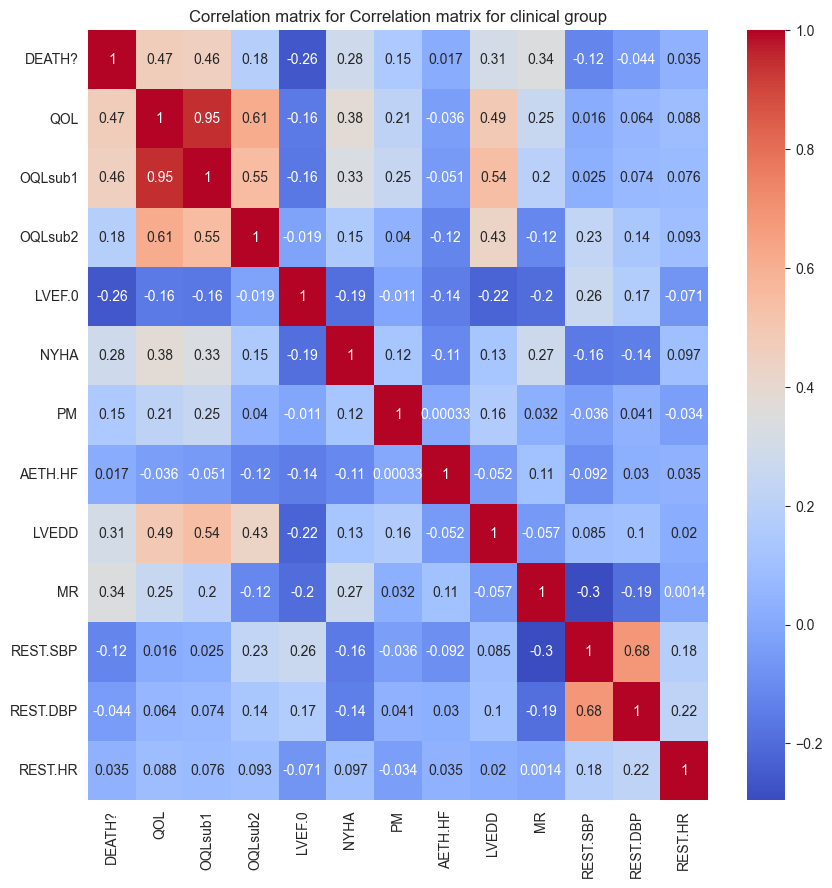

          correlation  missing_values  importance
QOL          0.379008               0    0.160110
OQLsub1      0.333027               0    0.075869
DEATH?       0.283967               0    0.036874
MR           0.272725               0    0.077501
LVEF.0       0.189337               0    0.142335
REST.SBP     0.156368               0    0.080015
OQLsub2      0.153981               0    0.018178
REST.DBP     0.138919               0    0.079971
LVEDD        0.127758               0    0.134564
PM           0.124848               0    0.014256
AETH.HF      0.109894               0    0.056216
REST.HR      0.097181               0    0.124112


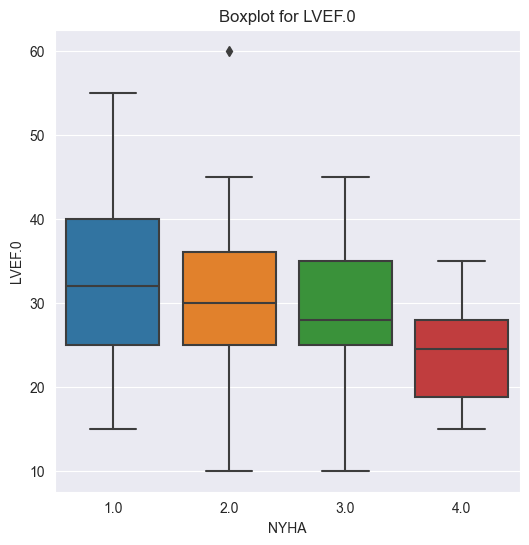

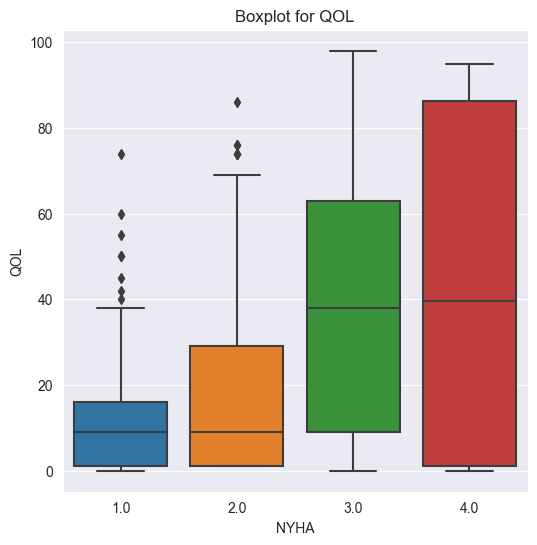

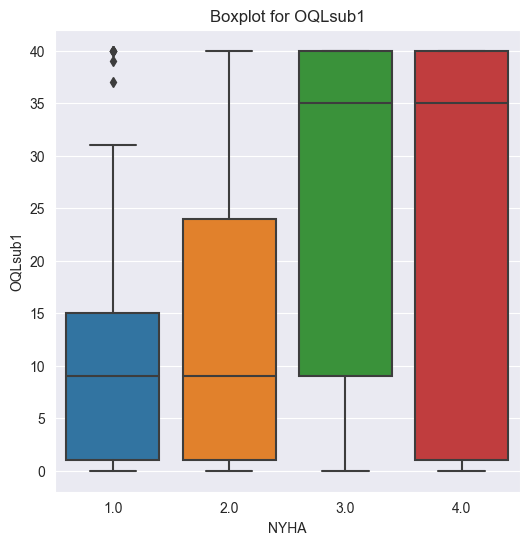

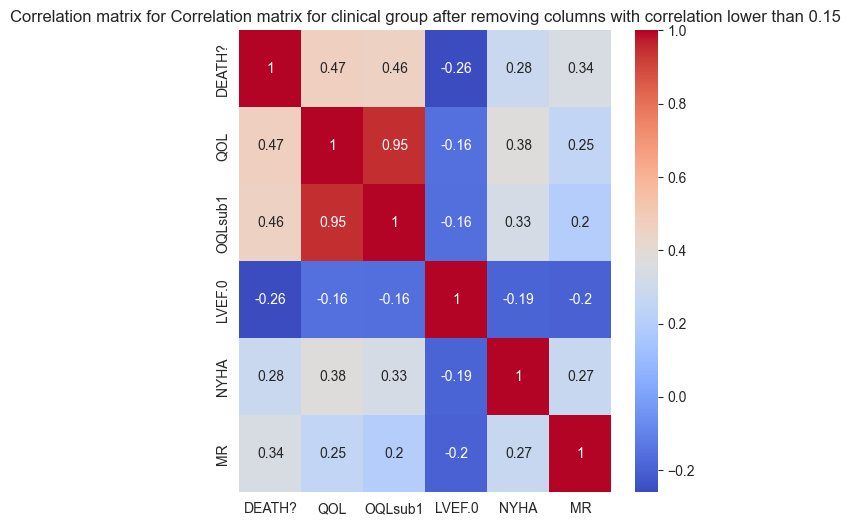

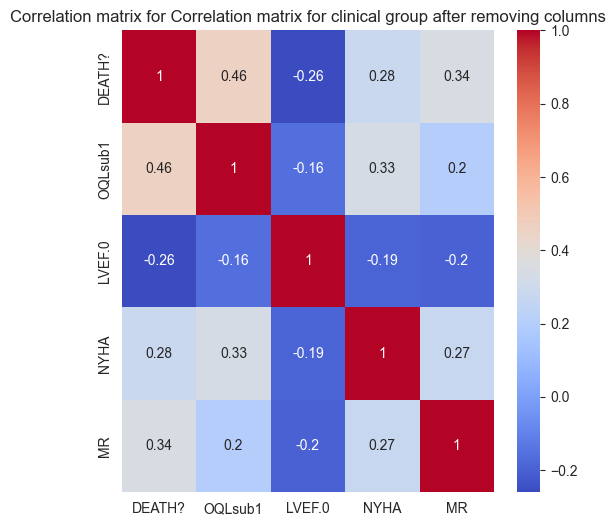

Cross validation score before grid search: 0.4304347826086956
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: 0.567391304347826
Cross validation score after grid search: 0.567391304347826
Mean cross validation score after optimize: 0.567391304347826
Growth of cross validation score: 0.13695652173913042
   feature  importance
1  OQLsub1    0.508990
2   LVEF.0    0.226858
3       MR    0.168199
0   DEATH?    0.095953


In [51]:
corr_matrix = clinical_group.corr()
# Plot correlation chart
plot_corr_matrix(clinical_group, 'Correlation matrix for clinical group', (10, 10))

# Prepare data with correlation, missing values and importance
group_checking = prepare_group_checking(clinical_group)

# Prepare data for Decision Tree Classifier
X = clinical_group.drop(columns=['NYHA'])
y = clinical_group['NYHA']

model = DecisionTreeClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_

group_checking = add_importance_to_group_checking(group_checking, feature_importances, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Print boxplots for variables 'LVEF.0','QOL', 'OQLsub1'
box_plots = ['LVEF.0', 'QOL', 'OQLsub1']
for column in box_plots:
    plot_boxplot(clinical_group, column, (6, 6), y=column)

# Remove column with correlation lower than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.18].index
clinical_group = clinical_group.drop(columns=columns_to_remove)

plot_corr_matrix(clinical_group,
                 'Correlation matrix for clinical group after removing columns with correlation lower than 0.15', (6, 6))

# Remove QOL and OQLsub2 columns - they are highly correlated with OQLsub1
columns_to_remove = ['QOL']
clinical_group = clinical_group.drop(columns=columns_to_remove)

# Additionally remove LVEDD and MR columns
# columns_to_remove = ['LVEDD', 'MR']
# clinical_group = clinical_group.drop(columns=columns_to_remove)

plot_corr_matrix(clinical_group, 'Correlation matrix for clinical group after removing columns', (6, 6))

X = clinical_group.drop(columns=['NYHA'])
y = clinical_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
clinical_model = grid_search.best_estimator_

test_with_cross_validation(clinical_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(clinical_model.feature_importances_, X)

# Conclusion from clinical group:
From the above table we can see that the most important variables are:
- QOL - result of quality of life questionnaire
- OQLsub1 - left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure.
- LVEF.0 - left ventricular ejection fraction

From this group we choose QOL and LVEF.0 variables as discriminative variables. And replace missing values with mean value.

---
# Technical group
## Technical group description
The technical group contains variables that are not directly related to the patient's health. These are variables such as the date of the examination, the date of death, the date of birth, etc.

## Technical group variables
**DEATHDATE** [VAR2] - date - date of death (if death=1) or date of the confirmation that the patient is still alive
**TIMEFU** [VAR3] - number - number of days between examination and date death or  date of the confirmation that the patient is still alive
**DOB** [VAR7] - date - date of birth
**DOE** [VAR8] - date - date of the examination

---

# Data preparation

In [64]:
technical_group = data[groups['technical']].copy()

# Print columns
print(f"Technical group columns: {technical_group.columns}")
print(f"Missing values: {technical_group.isnull().sum()}")

# Validation of each column

# Check DEATHDATE column (date)
print(f"Type of DEATHDATE column: {technical_group['DEATHDATE'].dtypes}")
print(f"DEATHDATE column unique values: {technical_group['DEATHDATE'].unique()}")
# Set all missing values with backward fill
technical_group['DEATHDATE'] = technical_group['DEATHDATE'].fillna(method='bfill')

# Check TIMEFU column (number)
print(f"Type of column TIMEFU: {technical_group['TIMEFU'].dtypes}")
print(f"TIMEFU column unique values: {technical_group['TIMEFU'].unique()}")
# Set incorrect string values to NaN
technical_group["TIMEFU"] = technical_group["TIMEFU"].apply(lambda x: np.nan if type(x) == str else x)
# Set all missing values with backward fill
technical_group["TIMEFU"] = technical_group["TIMEFU"].fillna(method='bfill')

# Check DOE column (date)
print(f"Type of DOE column: {technical_group['DOE'].dtypes}")
print(f"DOE column unique values: {technical_group['DOE'].unique()}")
# Set all missing values with backward fill
technical_group['DOE'] = technical_group['DOE'].fillna(method='bfill')

# Check DOB column (date)
print(f"Type of DOB column: {technical_group['DOB'].dtypes}")
print(f"DOB column unique values: {technical_group['DOB'].unique()}")
# Set all missing values with backward fill
technical_group['DOB'] = technical_group['DOB'].fillna(method='bfill')

# Add NYHA target variable
technical_group['NYHA'] = NYHA

Technical group columns: Index(['DEATHDATE', 'TIMEFU', 'DOB', 'DOE'], dtype='object')
Missing values: DEATHDATE     81
TIMEFU       108
DOB            7
DOE            0
dtype: int64
Type of DEATHDATE column: datetime64[ns]
DEATHDATE column unique values: <DatetimeArray>
['2012-02-03 00:00:00', '2012-08-12 00:00:00', '2012-02-21 00:00:00',
 '2013-02-03 00:00:00', '2012-04-06 00:00:00', '2012-12-21 00:00:00',
 '2006-04-15 00:00:00', '2013-02-02 00:00:00', '2007-11-08 00:00:00',
 '2011-06-10 00:00:00',
 ...
 '2012-05-01 00:00:00', '2009-09-12 00:00:00', '2010-07-29 00:00:00',
 '2009-07-07 00:00:00', '2006-05-02 00:00:00', '2006-11-05 00:00:00',
 '2011-12-22 00:00:00', '2007-09-29 00:00:00', '2008-04-19 00:00:00',
 '2007-06-15 00:00:00']
Length: 272, dtype: datetime64[ns]
Type of column TIMEFU: object
TIMEFU column unique values: [2076 2316 2349 2459 2629 2244 2506 39 2317 499 2435 1851 314 2203 772
 2517 2736 427 522 2569 2487 1249 1277 678 2137 2364 152 2530 473 2765 806
 824 254 2366 3

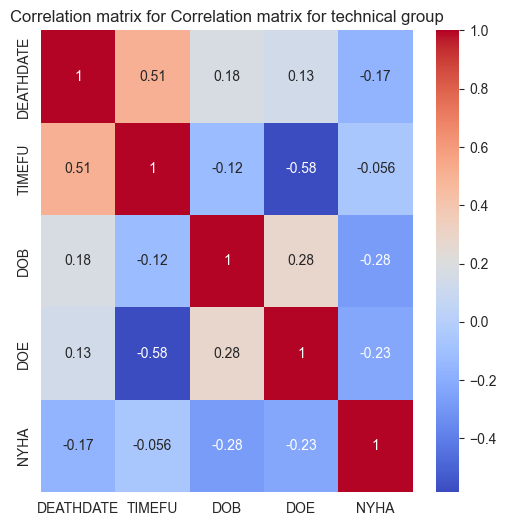

           correlation  missing_values
DOB           0.276316               0
DOE           0.227184               0
DEATHDATE     0.165802               0
TIMEFU        0.055607               0


In [67]:
plot_corr_matrix(technical_group, 'Correlation matrix for technical group', (6, 6))

# Print together corelation values for NYHA target variable with number of missing values
checking_data = prepare_group_checking(technical_group)
checking_data = convert_group_checking_to_dataframe(checking_data, columns=['correlation', 'missing_values'])
print(checking_data)
#
# X = technical_group.drop(columns=['NYHA'])
# y = technical_group['NYHA']
# model = DecisionTreeClassifier()
# model.fit(X, y)
#
# grid_search, before_grid_search = create_grid_search(model, X, y)
# technical_model = grid_search.best_estimator_
#
# test_with_cross_validation(technical_model, X, y, before_grid_search=before_grid_search)
# print_feature_importances(technical_model.feature_importances_, X)

## Conclusion from technical group:
From the above table we don't see any variable with high correlation with NYHA target variable. So we will not use any variable from this group.

---
# Demographic group
## Demographic group description
The group contains only one variable - age.

## Demographic group variables
**AGE** [VAR9] - number - age at examination

---

# Data preparation

In [81]:
demographic_group = data[groups['demographic']].copy()
print(f"Demographic group columns: {demographic_group.columns}")
print(f"Missing values: {demographic_group.isnull().sum()}")

# Validation of each column

# Check AGE column (number)
print(f"Type of AGE column: {demographic_group['AGE'].dtypes}")
print(f"AGE column unique values: {demographic_group['AGE'].unique()}")
# Round age to integer
demographic_group['AGE'] = demographic_group['AGE'].round()
# Set all missing values with backward fill
demographic_group['AGE'] = demographic_group['AGE'].fillna(method='bfill')
# Change type of AGE column to int
demographic_group['AGE'] = demographic_group['AGE'].astype(int)

# Add NYHA target variable
demographic_group['NYHA'] = NYHA

Demographic group columns: Index(['AGE'], dtype='object')
Missing values: AGE    7
dtype: int64
Type of AGE column: float64
AGE column unique values: [46.9890411  47.33150685 59.84931507 61.18630137 23.73150685 41.46849315
 41.49589041 46.01369863 47.45753425 49.91506849 53.84109589 54.21643836
 59.00547945 41.24109589 41.52328767 43.26575342 48.13972603 48.9369863
 50.61369863 52.27945205 53.68767123 58.3890411  58.79726027 62.57808219
 64.38356164 64.70410959 64.76712329 66.2109589  74.71232877 31.82191781
 43.41643836 47.68493151 47.77808219 52.61643836 53.01643836 53.44931507
 55.36164384 55.68219178 56.7890411  58.08767123 58.88219178 60.12328767
 61.26849315 61.66575342 62.25205479 64.36986301 65.67945205 67.06027397
 69.24109589 70.17534247 72.15890411 73.8739726  47.15068493 47.90958904
 53.29315068 55.6        56.30684932 57.58630137 59.38082192 62.58082192
 66.61643836 68.63287671 69.12328767 76.19726027 52.50410959 53.11232877
 54.36712329 54.41643836 56.08493151 64.17534247

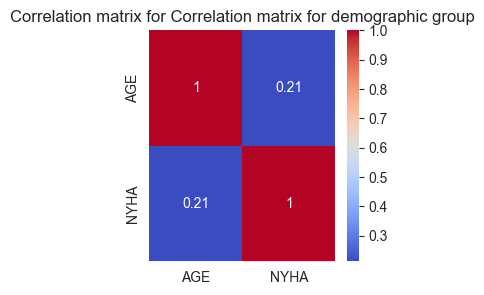

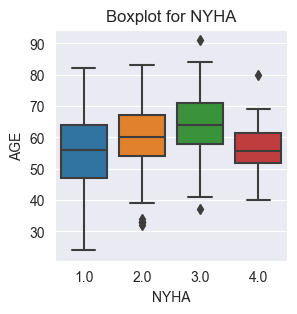

In [83]:
# Print correlation chart
plot_corr_matrix(demographic_group, 'Correlation matrix for demographic group', (3, 3))

# Print boxplot for NYHA and AGE
plot_boxplot(demographic_group, 'NYHA', (3, 3), x='NYHA', y='AGE')

# Conclusion from demographic group:
We choose AGE variable as discriminative variable. And replace missing values with mean value.

---
# Antrhopometric group
## Antrhopometric group description
The group contains variables related to the patient's body mass and height.

## Antrhopometric group variables
**HEIGHT.CM** [VAR10] - number - body height in cm
**WEIGHT.KG** [VAR11] - number - body mass in kg
**BMI** [VAR12] - number - body mass index (mass per squared height); <18.5=underweight range, 18.5 to <25 = normal, 25 - <30 = overweight, 30.0 or higher = obese.

---

# Data preparation

In [90]:
# Create anthropometric group
anthropometric_group = data[groups['anthropometry']].copy()
print(f"Anthropometry group columns: {anthropometric_group.columns}")
print(f"Mising values: {anthropometric_group.isnull().sum()}")

# Validation of each column

# Check HEIGHT.CM column (number)
print(f"Type of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].dtypes}")
# print(f"HEIGHT.CM column unique values: {anthropometric_group['HEIGHT.CM'].unique()}")
print(f"Max value of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].max()}")
print(f"Min value of HEIGHT.CM column: {anthropometric_group['HEIGHT.CM'].min()}")

# Check WEIGHT.KG column (number)
print(f"Type of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].dtypes}")
# print(f"WEIGHT.KG column unique values: {anthropometric_group['WEIGHT.KG'].unique()}")
print(f"Max value of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].max()}")
print(f"Min value of WEIGHT.KG column: {anthropometric_group['WEIGHT.KG'].min()}")

# Check BMI column (number)
print(f"Type of BMI column: {anthropometric_group['BMI'].dtypes}")
# print(f"BMI column unique values: {anthropometric_group['BMI'].unique()}")
print(f"Max value of BMI column: {anthropometric_group['BMI'].max()}")
print(f"Min value of BMI column: {anthropometric_group['BMI'].min()}")

# Add NYHA target variable
anthropometric_group['NYHA'] = NYHA

Anthropometry group columns: Index(['HEIGHT.CM', 'WEIGHT.KG', 'BMI'], dtype='object')
Mising values: HEIGHT.CM    0
WEIGHT.KG    0
BMI          0
dtype: int64
Type of HEIGHT.CM column: float64
Max value of HEIGHT.CM column: 190.0
Min value of HEIGHT.CM column: 152.0
Type of WEIGHT.KG column: float64
Max value of WEIGHT.KG column: 144.0
Min value of WEIGHT.KG column: 49.0
Type of BMI column: float64
Max value of BMI column: 44.4444444444444
Min value of BMI column: 16.0664819944598


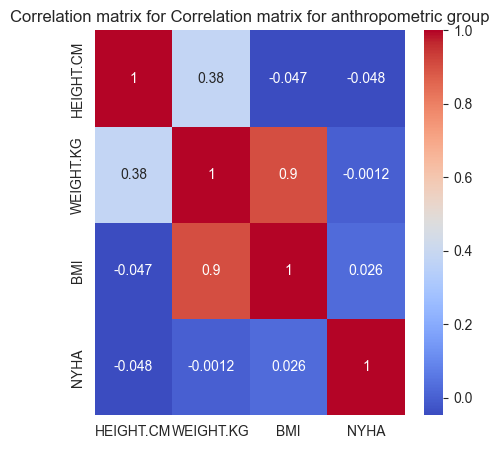

           correlation  missing_values
HEIGHT.CM     0.047999               0
BMI           0.026335               0
WEIGHT.KG     0.001209               0


In [93]:
plot_corr_matrix(anthropometric_group, 'Correlation matrix for anthropometric group', (5, 5))

# Print together corelation values for NYHA target variable with number of missing values
group_checking = prepare_group_checking(anthropometric_group)
group_checking = convert_group_checking_to_dataframe(group_checking, columns=['correlation', 'missing_values'])
print(group_checking)

# Conclusion from anthropometric group:
From the above table we don't see any variable with high correlation with NYHA target variable. So we will not use any variable from this group.

---
# Comorbidities group
## Comorbidities group description
The group contains variables related to the patient's comorbidities.

## Comorbidities group variables
**VAR17** [MI] - binary - information about previous myocardial infarction (1=yes)
**VAR18** [AF] - binary - information about atrial fibrillation (1=yes)
**VAR19** [DM] - binary - information about diabetes (1=yes)
**VAR20** [HT] - binary - information about hypertension (1=yes)
**VAR21** [COPD] - binary - information about lung  disease (1=yes)
**VAR22** [STROKE] - binary - information about previous stroke (1=yes)
**VAR23** [KIDNEY.DIS] - binary - information about kidney disease (1=yes)

---

# Data preparation

In [111]:
# Create comorbidities group
comorbidities_group = data[groups['comorbidities']].copy()
print(f"Comorbidities group columns: {comorbidities_group.columns}")
print(f"Mising values: {comorbidities_group.isnull().sum()}")

# Validation of each column

# Check MI column (binary)
print(f"Type of MI column: {comorbidities_group['MI'].dtypes}")
print(f"MI column unique values: {comorbidities_group['MI'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['MI'] = comorbidities_group['MI'].fillna(0)

# Check AF column (binary)
print(f"Type of AF column: {comorbidities_group['AF'].dtypes}")
print(f"AF column unique values: {comorbidities_group['AF'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['AF'] = comorbidities_group['AF'].fillna(0)

# Check DM column (binary)
print(f"Type of DM column: {comorbidities_group['DM'].dtypes}")
print(f"DM column unique values: {comorbidities_group['DM'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['DM'] = comorbidities_group['DM'].fillna(0)

# Check HT column (binary)
print(f"Type of HT column: {comorbidities_group['HT'].dtypes}")
print(f"HT column unique values: {comorbidities_group['HT'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['HT'] = comorbidities_group['HT'].fillna(0)

# Check COPD column (binary)
print(f"Type of COPD column: {comorbidities_group['COPD'].dtypes}")
print(f"COPD column unique values: {comorbidities_group['COPD'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['COPD'] = comorbidities_group['COPD'].fillna(0)

# Check STROKE column (binary)
print(f"Type of STROKE column: {comorbidities_group['STROKE'].dtypes}")
print(f"STROKE column unique values: {comorbidities_group['STROKE'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['STROKE'] = comorbidities_group['STROKE'].fillna(0)

# Check KIDNEY.DIS column (binary)
print(f"Type of KIDNEY.DIS column: {comorbidities_group['KIDNEY.DIS'].dtypes}")
print(f"KIDNEY.DIS column unique values: {comorbidities_group['KIDNEY.DIS'].unique()}")
# Set all missing values with 0 (no comorbidity)
comorbidities_group['KIDNEY.DIS'] = comorbidities_group['KIDNEY.DIS'].fillna(0)

# Add NYHA target variable
comorbidities_group['NYHA'] = NYHA

Comorbidities group columns: Index(['MI', 'AF', 'DM', 'HT', 'COPD', 'STROKE', 'KIDNEY.DIS'], dtype='object')
Mising values: MI             25
AF              4
DM             27
HT            106
COPD           49
STROKE         47
KIDNEY.DIS     89
dtype: int64
Type of MI column: float64
MI column unique values: [ 1.  0. nan]
Type of AF column: float64
AF column unique values: [ 0.  1. nan]
Type of DM column: float64
DM column unique values: [ 1.  0. nan]
Type of HT column: float64
HT column unique values: [ 1.  0. nan]
Type of COPD column: float64
COPD column unique values: [ 0.  1. nan]
Type of STROKE column: float64
STROKE column unique values: [ 0.  1. nan]
Type of KIDNEY.DIS column: float64
KIDNEY.DIS column unique values: [ 0.  1. nan]


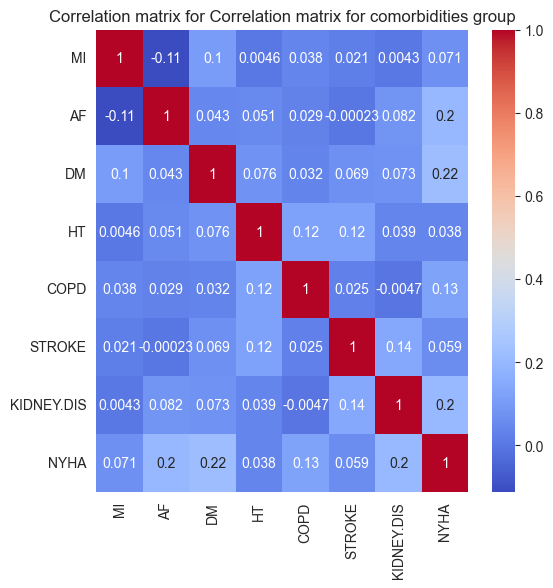

            correlation  missing_values  importance
DM             0.216547               0    0.161562
KIDNEY.DIS     0.202854               0    0.124995
AF             0.197635               0    0.104259
COPD           0.125098               0    0.126786
MI             0.071088               0    0.204689
STROKE         0.058923               0    0.150050
HT             0.038133               0    0.127659
Columns to remove: Index(['COPD', 'MI', 'STROKE', 'HT'], dtype='object')
Columns before removing: Index(['MI', 'AF', 'DM', 'HT', 'COPD', 'STROKE', 'KIDNEY.DIS', 'NYHA'], dtype='object')


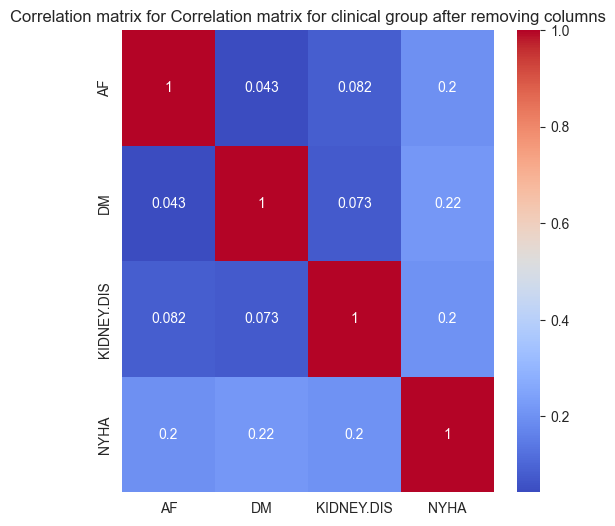

Cross validation score before grid search: 0.5260869565217392
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: 0.5326086956521738
Cross validation score after grid search: 0.5217391304347826
Mean cross validation score after optimize: 0.5217391304347826
Growth of cross validation score: -0.004347826086956608
      feature  importance
1          DM    0.449744
2  KIDNEY.DIS    0.323448
0          AF    0.226808


In [112]:
# Print correlation chart
plot_corr_matrix(comorbidities_group, 'Correlation matrix for comorbidities group', (6, 6))

group_checking = prepare_group_checking(comorbidities_group)

# Print together corelation values for NYHA target variable with number of missing values
X = comorbidities_group.drop(columns=['NYHA'])
y = comorbidities_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking, model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.15].index
print(f"Columns to remove: {columns_to_remove}")
print(f"Columns before removing: {comorbidities_group.columns}")
comorbidities_group = comorbidities_group.drop(columns=columns_to_remove)

plot_corr_matrix(comorbidities_group, 'Correlation matrix for clinical group after removing columns', (6, 6))

X = comorbidities_group.drop(columns=['NYHA'])
y = comorbidities_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
comorbidities_model = grid_search.best_estimator_

test_with_cross_validation(comorbidities_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(comorbidities_model.feature_importances_, X)

# Conclusion from comorbidities group:
From the above table we can see that the most important variables are:
- AF - atrial fibrillation (migotanie przedsionków)
- KIDNEY.DIS - kidney disease (choroba nerek)
- MI - myocardial infarction (zawał mięśnia sercowego)

From this group we choose AF, KIDNEY.DIS and MI variables as discriminative variables. The missing values will be replaced with 0 (no comorbidity).

---
# Treatment group

## Treatment group description
The treatment group contains information about treatment of patients.

## Treatment group variables
- **ACEI.ARB** [VAR24] - binary - information about treatment using ace-inhibitors or ARB (similar drugs, 1=yes)
- **BB** [VAR25] - binary - information about treatment using beta blockers (1=yes)
- **MRA** [VAR26] - binary - information about treatment using  aldosterone antagonists (1=yes)
- **DIUR** [VAR27] - binary - information about treatment using oral diuretics (1=yes)
- **ANTIPLAT** [VAR28] - binary - information about treatment using antiplatelet drugs (1=yes)
- **STATIN** [VAR29] - binary - information about treatment using statin (1=yes)
- **DIGOX** [VAR30] - binary - information about treatment using digoxin (1=yes)

---

# Data preparation

In [121]:
# Create treatment group
treatment_group = data[groups['treatment']].copy()
print(f"Treatment group columns: {treatment_group.columns}")
print(f"Missing values: {treatment_group.isnull().sum()}")

# Validation of each column

# Check ACEI.ARB column (binary)
print(f"Type of ACEI.ARB column: {treatment_group['ACEI.ARB'].dtypes}")
print(f"ACEI.ARB column unique values: {treatment_group['ACEI.ARB'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['ACEI.ARB'] = treatment_group['ACEI.ARB'].fillna(0)

# Check BB column (binary)
print(f"Type of BB column: {treatment_group['BB'].dtypes}")
print(f"BB column unique values: {treatment_group['BB'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['BB'] = treatment_group['BB'].fillna(0)


# Check MRA column (binary)
print(f"Type of MRA column: {treatment_group['MRA'].dtypes}")
print(f"MRA column unique values: {treatment_group['MRA'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['MRA'] = treatment_group['MRA'].fillna(0)

# Check DIUR column (binary)
print(f"Type of DIUR column: {treatment_group['DIUR'].dtypes}")
print(f"DIUR column unique values: {treatment_group['DIUR'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['DIUR'] = treatment_group['DIUR'].fillna(0)

# Check ANTIPLAT column (binary)
print(f"Type of ANTIPLAT column: {treatment_group['ANTIPLAT'].dtypes}")
print(f"ANTIPLAT column unique values: {treatment_group['ANTIPLAT'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['ANTIPLAT'] = treatment_group['ANTIPLAT'].fillna(0)

# Check STATIN column (binary)
print(f"Type of STATIN column: {treatment_group['STATIN'].dtypes}")
print(f"STATIN column unique values: {treatment_group['STATIN'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['STATIN'] = treatment_group['STATIN'].fillna(0)

# Check DIGOX column (binary)
print(f"Type of DIGOX column: {treatment_group['DIGOX'].dtypes}")
print(f"DIGOX column unique values: {treatment_group['DIGOX'].unique()}")
# In DIGOX we have additional value 9.0 - unknown so we replace it with 0
treatment_group['DIGOX'] = treatment_group['DIGOX'].replace(9.0, 0)
print(f"DIGOX column unique values: {treatment_group['DIGOX'].unique()}")
# Set all missing values with 0 (no treatment)
treatment_group['DIGOX'] = treatment_group['DIGOX'].fillna(0)

# Check if there are any missing values
print(f"Missing values: {treatment_group.isnull().sum()}")

# Add NYHA target variable
treatment_group['NYHA'] = NYHA

Treatment group columns: Index(['ACEI.ARB', 'BB', 'MRA', 'DIUR', 'ANTIPLAT', 'STATIN', 'DIGOX'], dtype='object')
Missing values: ACEI.ARB     1
BB           1
MRA         13
DIUR         5
ANTIPLAT     1
STATIN       2
DIGOX        2
dtype: int64
Type of ACEI.ARB column: float64
ACEI.ARB column unique values: [ 1.  0. nan]
Type of BB column: float64
BB column unique values: [ 1.  0. nan]
Type of MRA column: float64
MRA column unique values: [ 1.  0. nan]
Type of DIUR column: float64
DIUR column unique values: [ 1.  0. nan]
Type of ANTIPLAT column: float64
ANTIPLAT column unique values: [ 1.  0. nan]
Type of STATIN column: float64
STATIN column unique values: [ 1.  0. nan]
Type of DIGOX column: float64
DIGOX column unique values: [ 0.  1.  9. nan]
DIGOX column unique values: [ 0.  1. nan]
Missing values: ACEI.ARB    0
BB          0
MRA         0
DIUR        0
ANTIPLAT    0
STATIN      0
DIGOX       0
dtype: int64


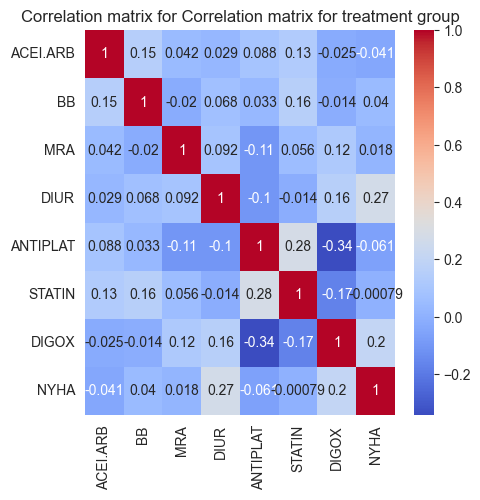

          correlation  missing_values  importance
DIUR         0.273308               0    0.203359
DIGOX        0.203265               0    0.066039
ANTIPLAT     0.060562               0    0.107212
ACEI.ARB     0.041197               0    0.116678
BB           0.040309               0    0.112838
MRA          0.018168               0    0.234692
STATIN       0.000790               0    0.159182


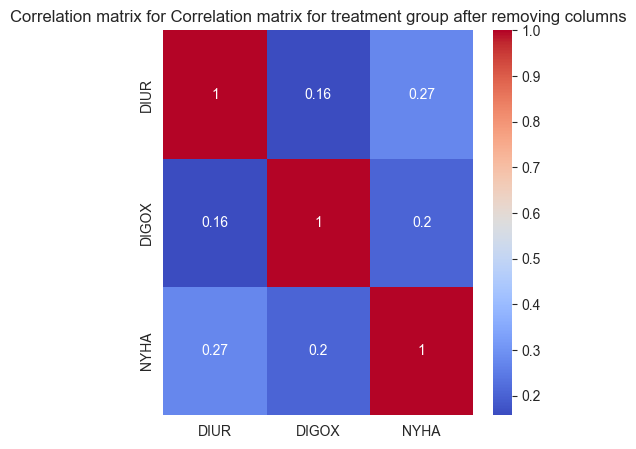

Cross validation score before grid search: 0.5282608695652173
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.4826086956521739
Cross validation score after grid search: 0.5130434782608695
Mean cross validation score after optimize: 0.5130434782608695
Growth of cross validation score: -0.01521739130434785
  feature  importance
0    DIUR    0.754865
1   DIGOX    0.245135


In [122]:
# Correlation matrix
plot_corr_matrix(treatment_group, 'Correlation matrix for treatment group', (5, 5))

group_checking = prepare_group_checking(treatment_group)

# Find important variables and replace all missing values with 0 (no treatment)
treatment_group = treatment_group.fillna(0)

# Prepare data for Decision Tree Classifier
X = treatment_group.drop(columns=['NYHA'])
y = treatment_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)
group_checking = add_importance_to_group_checking(group_checking,  model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.05
columns_to_remove = group_checking[group_checking['correlation'] < 0.20].index
treatment_group = treatment_group.drop(columns=columns_to_remove)

plot_corr_matrix(treatment_group, 'Correlation matrix for treatment group after removing columns', (5, 5))

X = treatment_group.drop(columns=['NYHA'])
y = treatment_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
treatment_model = grid_search.best_estimator_

test_with_cross_validation(treatment_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(treatment_model.feature_importances_, X)

# Conclusion from treatment group:

From the above table we can see that the most important variables are:
- DIUR - diuretics (leki moczopędne)
- MRA - mineralocorticoid receptor antagonists (antagoniści receptora mineralokortykoidowego)
- DIGOX - digoxin (leki glikozydowe)

From this group we choose DIUR and DIGOX variables as discriminative variables (No MRA because there is low correlation with NYHA). The missing values will be replaced with 0 (no treatment).

---
# Biochemistry group
## Biochemistry group description
This group contains variables from biochemistry tests.

## Biochemistry group variables
- **HB** [VAR31] - number - level of blood hemoglobin
- **NA** [VAR32] - number - level of blood sodium
- **K** [VAR33] - number - level of blood potassium
- **BNP** [VAR34] - number - level of blood peptide: BNP (elevated level is characteristic for heart failure)
- **CRP** [VAR35] - number - level of blood protein CRP (characteristic for inflammation)

---

# Data preparation

In [127]:
# Create biochemistry group
biochemistry_group = data[groups['biochemistry']].copy()
print(f"Biochemistry group columns: {biochemistry_group.columns}")
print(f"Missing values: {biochemistry_group.isnull().sum()}")

# Validation of each column

# Check HB column (number)
print(f"Type of HB column: {biochemistry_group['HB'].dtypes}")
print(f"HB column unique values: {biochemistry_group['HB'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['HB'] = biochemistry_group['HB'].fillna(method='bfill')

# Check NA column (number)
print(f"Type of NA column: {biochemistry_group['NA'].dtypes}")
print(f"NA column unique values: {biochemistry_group['NA'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['NA'] = biochemistry_group['NA'].fillna(method='bfill')

# Check K column (number)
print(f"Type of K column: {biochemistry_group['K'].dtypes}")
print(f"K column unique values: {biochemistry_group['K'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['K'] = biochemistry_group['K'].fillna(method='bfill')

# Check BNP column (number)
print(f"Type of BNP column: {biochemistry_group['BNP'].dtypes}")
print(f"BNP column unique values: {biochemistry_group['BNP'].unique()}")
# In BNP we have additional value 9999.0 - unknown so we replace it with NaN
is_string = biochemistry_group['BNP'].apply(lambda x: isinstance(x, str))
biochemistry_group['BNP'] = biochemistry_group['BNP'].where(~is_string, np.nan)
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['BNP'] = biochemistry_group['BNP'].fillna(method='bfill')

# Check CRP column (number)
print(f"Type of CRP column: {biochemistry_group['CRP'].dtypes}")
print(f"CRP column unique values: {biochemistry_group['CRP'].unique()}")
# Set all missing values with bfill (use next valid observation to fill gap)
biochemistry_group['CRP'] = biochemistry_group['CRP'].fillna(method='bfill')

# Add NYHA target variable
biochemistry_group['NYHA'] = NYHA

Biochemistry group columns: Index(['HB', 'NA', 'K', 'BNP', 'CRP'], dtype='object')
Missing values: HB      15
NA      16
K       16
BNP     44
CRP    150
dtype: int64
Type of HB column: float64
HB column unique values: [17.8 14.5 15.1 14.6 13.7 15.7 15.6 14.7 16.7 12.3 15.5 16.1 13.1 12.8
 15.2 13.8 15.3 17.6 14.1 17.  12.7 10.7 11.1 13.4 13.9 16.  14.8 16.9
 11.4 16.6 15.4 14.3 12.9 13.6  9.3 12.5 14.4 12.2 14.  14.9 15.8 10.2
 13.2 18.3 13.5 12.6  nan 15.  11.6 17.7 16.3 17.1 14.2 13.  12.  11.8
 16.8 16.5 12.1 12.4 11.9 10.3 17.3 11.3  9.4 10.  10.4 10.5 13.3 17.5
 11.2 16.4 11.5 15.9 11.7 11.  16.2  9.6]
Type of NA column: float64
NA column unique values: [140. 141. 142. 143. 138. 144. 135. 146. 147. 139. 137. 134. 132. 136.
 130. 145. 129. 131.  nan 148. 152. 150. 121. 127. 128.  14.  43.]
Type of K column: float64
K column unique values: [0.94 1.3  1.02 1.11 0.8  0.77 1.01 1.1  0.98 1.12 1.03 0.81 0.99 1.15
 1.07 0.9  1.05 1.19 0.93 1.45 0.97 1.31 1.2  0.89 1.04 1.08 1.46 0.86
 1

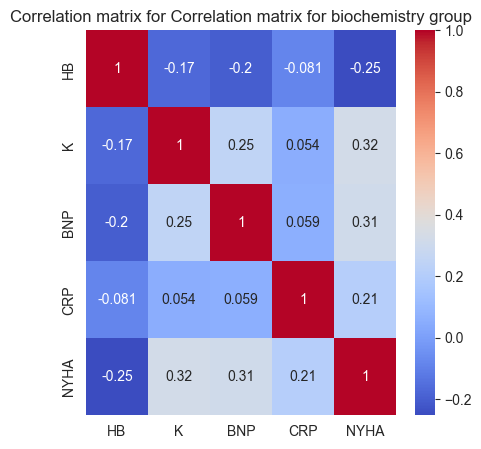

     correlation  missing_values  importance
K       0.322426               0    0.264847
BNP     0.312063               0    0.282272
HB      0.252262               0    0.244938
CRP     0.211861               0    0.207943


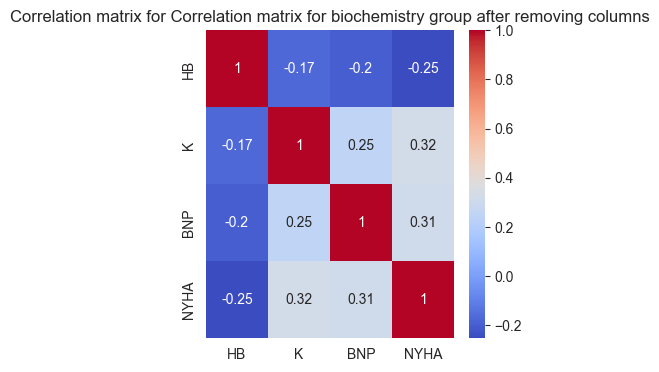

Cross validation score before grid search: 0.44130434782608696
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best score: 0.5630434782608695
Cross validation score after grid search: 0.5173913043478261
Mean cross validation score after optimize: 0.5173913043478261
Growth of cross validation score: 0.07608695652173914
  feature  importance
2     BNP    0.467804
1       K    0.298694
0      HB    0.233502


In [129]:
# Correlation matrix
plot_corr_matrix(biochemistry_group, 'Correlation matrix for biochemistry group', (5, 5))

# Check correlation with NYHA
group_checking = prepare_group_checking(biochemistry_group)

# Find important variables and replace all missing values with bifill (use next valid observation to fill gap)
biochemistry_group = biochemistry_group.fillna(method='bfill')

# Prepare data for Decision Tree Classifier
X = biochemistry_group.drop(columns=['NYHA'])
y = biochemistry_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking,  model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.25].index
biochemistry_group = biochemistry_group.drop(columns=columns_to_remove)

plot_corr_matrix(biochemistry_group, 'Correlation matrix for biochemistry group after removing columns', (4, 4))

X = biochemistry_group.drop(columns=['NYHA'])
y = biochemistry_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
biochemistry_model = grid_search.best_estimator_

test_with_cross_validation(biochemistry_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(biochemistry_model.feature_importances_, X)

# Conclusion from biochemistry group:
From the above table we can see that the most important variables are:
- BNP - level of blood peptide (poziom peptydu BNP) (podwyższony poziom BNP wskazuje na niewydolność serca)
- NA - level of sodium (poziom sodu)
- K - level of potassium (poziom potasu)
- HB - level of hemoglobin (poziom hemoglobiny)

From this group we choose BNP, NA, K and HB variables as discriminative variables. The missing values will be replaced with mean.

---
# Fitness level group
## Fitness level group description
The fitness level group contains variables that describe the patient's fitness level.

## Fitness level group variables
- **EXERCISE1** [VAR41] - number - number of seconds needed to complete the task, higher number = worse
- **EXERCISE2** [VAR42] - number - number of repeated movements during the task (higher number = better result)
- **EXERCISE3** [VAR43] - number - number of repeated movements during the task (higher number = better result)
- **6MWT.DIST** [VAR44] - number - number of meters (distance) covered by the patient during the 6 minute walking test (bigger number = better)
- **6MWT.FATIGUE** [VAR45] - number OR categories(?) - the level of fatigue assessed by the patient after walking test (using a scale 0-10)
- **6MWT.DYSPN** [VAR46] - number OR categories(?) - the level of shortness of breath during walking test assessed by the patient  (using a scale 0-10)
- **6MWT.SBP1** [VAR47] - number - systolic blood pressure measured before the walking test
- **6MWT.DBP1** [VAR48] - number - diastolic blood pressure measured before the walking test
- **6MWT.HR1** [VAR49] - number - heart rate measured before the walking test
- **6MWT.SBP2** [VAR50] - number - systolic blood pressure measured after the walking test
- **6MWT.DBP2** [VAR51] - number - diastolic blood pressure measured after the walking test
- **6MWT.HR2** [VAR52] - number - heart rate measured after the walking test
- **EXERCISE4** [VAR53] - number - the patient is asked to touch his/her feet with the fingers of the palms. The number represents centimeters. Negative number means: number of centimeters  between the patients palm and leg in case of failing to touch the feet (higher number of negative centimeters = worse result). Positive number means that the patient could touch his feet without problems (higher number - better result)
- **EXERCISE5** [VAR54] - number - the patient is asked to touch left palm with the right one but it has to be done at his back (one palm is directed up, the second is directed down). The number represents centimeters. Negative number means: number of centimeters  between the patients palms in case of failing to touch both palms (higher number of negative centimeters = worse result). Positive number means that the patient could touch his palms without problems (higher number - better result)
- **CPX.TIME** [VAR55] - number - time of exercise on a treadmill
- **CPX.PEAKVO2** [VAR56] - number - peak oxygen consumption during exercise testing on a treadmill
- **CPX.PEAKVO2FORBM** [VAR57] - number - peak oxygen consumption during exercise testing on a treadmill per body mass
- **RER** [VAR58] - number - respiratory exchange ratio(index of metabolism during an exercise on a treadmill)
- **SLOPE** [VAR59] - number - slope between oxygen and carbon dioxide during exercise testing on a treadmill
- **METS** [VAR60] - number - number of metabolic equivalents (level of work performed by the patient during exercise using a treadmill)
- **WEBER** [VAR61] - categories - The Weber classification: stratification of patients based on peak VO2 and anaerobic threshold to define functional physical capacity. Higher class is worse
- **PEAK>18** [VAR62] - binary - Dividing patients based on a cutoff value of peak oxygen consumption (used for Weber)
- **SLOPE>35** [VAR63] - binary - Dividing patients based on a cutoff value of slope (used for Weber)

---

# Prepare fitness level group

In [160]:
# Create fitness_level group
fitness_level_group = data[groups['fitness_level']].copy()
print(f"Fitness level group columns: {fitness_level_group.columns}")
print(f"Missing values: {fitness_level_group.isna().sum()}")
potential_remove_columns = []
# Validation of each column

# EXERCISE1
print(f"EXERCISE1 missing values: {fitness_level_group['EXERCISE1'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE1'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE1'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE1'] = fitness_level_group['EXERCISE1'].fillna(fitness_level_group['EXERCISE1'].mean())

# EXERCISE2
print(f"EXERCISE2 missing values: {fitness_level_group['EXERCISE2'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE2'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE2'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE2'] = fitness_level_group['EXERCISE2'].fillna(fitness_level_group['EXERCISE2'].mean())

# EXERCISE3
print(f"EXERCISE3 missing values: {fitness_level_group['EXERCISE3'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE3'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE3'].min()}")
# Replace missing values with the mean
fitness_level_group['EXERCISE3'] = fitness_level_group['EXERCISE3'].fillna(fitness_level_group['EXERCISE3'].mean())

# 6MWT.DIST
print(f"6MWT.DIST missing values: {fitness_level_group['6MWT.DIST'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DIST'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DIST'].min()}")
# Replace missing values with the mean
fitness_level_group['6MWT.DIST'] = fitness_level_group['6MWT.DIST'].fillna(fitness_level_group['6MWT.DIST'].mean())

# 6MWT.FATIGUE
print(f"6MWT.FATIGUE missing values: {fitness_level_group['6MWT.FATIGUE'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.FATIGUE'].max()}")
print(f"Min value: {fitness_level_group['6MWT.FATIGUE'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.FATIGUE')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.FATIGUE'] = fitness_level_group['6MWT.FATIGUE'].fillna(method='bfill')

# 6MWT.DYSPN
print(f"6MWT.DYSPN missing values: {fitness_level_group['6MWT.DYSPN'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DYSPN'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DYSPN'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DYSPN')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DYSPN'] = fitness_level_group['6MWT.DYSPN'].fillna(method='bfill')

# 6MWT.SBP1
print(f"6MWT.SBP1 missing values: {fitness_level_group['6MWT.SBP1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.SBP1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.SBP1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.SBP1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.SBP1'] = fitness_level_group['6MWT.SBP1'].fillna(method='bfill')

# 6MWT.DBP1
print(f"6MWT.DBP1 missing values: {fitness_level_group['6MWT.DBP1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DBP1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DBP1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DBP1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DBP1'] = fitness_level_group['6MWT.DBP1'].fillna(method='bfill')

# 6MWT.HR1
print(f"6MWT.HR1 missing values: {fitness_level_group['6MWT.HR1'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.HR1'].max()}")
print(f"Min value: {fitness_level_group['6MWT.HR1'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.HR1')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.HR1'] = fitness_level_group['6MWT.HR1'].fillna(method='bfill')

# 6MWT.SBP2
print(f"6MWT.SBP2 missing values: {fitness_level_group['6MWT.SBP2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.SBP2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.SBP2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.SBP2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.SBP2'] = fitness_level_group['6MWT.SBP2'].fillna(method='bfill')

# 6MWT.DBP2
print(f"6MWT.DBP2 missing values: {fitness_level_group['6MWT.DBP2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.DBP2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.DBP2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.DBP2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.DBP2'] = fitness_level_group['6MWT.DBP2'].fillna(method='bfill')

# 6MWT.HR2
print(f"6MWT.HR2 missing values: {fitness_level_group['6MWT.HR2'].isna().sum()}")
print(f"Max value: {fitness_level_group['6MWT.HR2'].max()}")
print(f"Min value: {fitness_level_group['6MWT.HR2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('6MWT.HR2')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['6MWT.HR2'] = fitness_level_group['6MWT.HR2'].fillna(method='bfill')

# EXERCISE4
print(f"EXERCISE4 missing values: {fitness_level_group['EXERCISE4'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE4'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE4'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('EXERCISE4')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['EXERCISE4'] = fitness_level_group['EXERCISE4'].fillna(method='bfill')

# EXERCISE5
print(f"EXERCISE5 missing values: {fitness_level_group['EXERCISE5'].isna().sum()}")
print(f"Max value: {fitness_level_group['EXERCISE5'].max()}")
print(f"Min value: {fitness_level_group['EXERCISE5'].min()}")
#  Add to potential remove columns because of high number of missing values
potential_remove_columns.append('EXERCISE5')
# Replace missing values with bfill (use next valid observation to fill gap)
fitness_level_group['EXERCISE5'] = fitness_level_group['EXERCISE5'].fillna(method='bfill')

# CPX.TIME
print(f"CPX.TIME missing values: {fitness_level_group['CPX.TIME'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.TIME'].max()}")
print(f"Min value: {fitness_level_group['CPX.TIME'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.TIME')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.TIME'] = fitness_level_group['CPX.TIME'].fillna(method='bfill')
fitness_level_group['CPX.TIME'] = fitness_level_group['CPX.TIME'].fillna(method='ffill')

# CPX.PEAKVO2
print(f"CPX.PEAKVO2 missing values: {fitness_level_group['CPX.PEAKVO2'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.PEAKVO2'].max()}")
print(f"Min value: {fitness_level_group['CPX.PEAKVO2'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.PEAKVO2')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.PEAKVO2'] = fitness_level_group['CPX.PEAKVO2'].fillna(method='bfill')
fitness_level_group['CPX.PEAKVO2'] = fitness_level_group['CPX.PEAKVO2'].fillna(method='ffill')

# CPX.PEAKVO2FORBM
print(f"CPX.PEAKVO2FORBM missing values: {fitness_level_group['CPX.PEAKVO2FORBM'].isna().sum()}")
print(f"Max value: {fitness_level_group['CPX.PEAKVO2FORBM'].max()}")
print(f"Min value: {fitness_level_group['CPX.PEAKVO2FORBM'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('CPX.PEAKVO2FORBM')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['CPX.PEAKVO2FORBM'] = fitness_level_group['CPX.PEAKVO2FORBM'].fillna(method='bfill')
fitness_level_group['CPX.PEAKVO2FORBM'] = fitness_level_group['CPX.PEAKVO2FORBM'].fillna(method='ffill')

# RER
print(f"RER missing values: {fitness_level_group['RER'].isna().sum()}")
print(f"Max value: {fitness_level_group['RER'].max()}")
print(f"Min value: {fitness_level_group['RER'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('RER')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['RER'] = fitness_level_group['RER'].fillna(method='bfill')
fitness_level_group['RER'] = fitness_level_group['RER'].fillna(method='ffill')

# SLOPE
print(f"SLOPE missing values: {fitness_level_group['SLOPE'].isna().sum()}")
print(f"Max value: {fitness_level_group['SLOPE'].max()}")
print(f"Min value: {fitness_level_group['SLOPE'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('SLOPE')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['SLOPE'] = fitness_level_group['SLOPE'].fillna(method='bfill')
fitness_level_group['SLOPE'] = fitness_level_group['SLOPE'].fillna(method='ffill')

# METS
print(f"METS missing values: {fitness_level_group['METS'].isna().sum()}")
print(f"Max value: {fitness_level_group['METS'].max()}")
print(f"Min value: {fitness_level_group['METS'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('METS')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['METS'] = fitness_level_group['METS'].fillna(method='bfill')
fitness_level_group['METS'] = fitness_level_group['METS'].fillna(method='ffill')

# WEBER
print(f"WEBER missing values: {fitness_level_group['WEBER'].isna().sum()}")
print(f"Max value: {fitness_level_group['WEBER'].max()}")
print(f"Min value: {fitness_level_group['WEBER'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('WEBER')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['WEBER'] = fitness_level_group['WEBER'].fillna(method='bfill')
fitness_level_group['WEBER'] = fitness_level_group['WEBER'].fillna(method='ffill')

# PEAK>18
print(f"PEAK>18 missing values: {fitness_level_group['PEAK>18'].isna().sum()}")
print(f"Max value: {fitness_level_group['PEAK>18'].max()}")
print(f"Min value: {fitness_level_group['PEAK>18'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('PEAK>18')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['PEAK>18'] = fitness_level_group['PEAK>18'].fillna(method='bfill')
fitness_level_group['PEAK>18'] = fitness_level_group['PEAK>18'].fillna(method='ffill')

# SLOPE>35
print(f"SLOPE>35 missing values: {fitness_level_group['SLOPE>35'].isna().sum()}")
print(f"Max value: {fitness_level_group['SLOPE>35'].max()}")
print(f"Min value: {fitness_level_group['SLOPE>35'].min()}")
# Add to potential remove columns because of high number of missing values
potential_remove_columns.append('SLOPE>35')
# Replace missing values with bfill (use next valid observation to fill gap) and ffill (use previous valid observation to fill gap)
fitness_level_group['SLOPE>35'] = fitness_level_group['SLOPE>35'].fillna(method='bfill')
fitness_level_group['SLOPE>35'] = fitness_level_group['SLOPE>35'].fillna(method='ffill')

# Add NYHA target variable
fitness_level_group['NYHA'] = NYHA

# Print missing values
print(f"Missing values: {fitness_level_group.isna().sum().sum()}")

Fitness level group columns: Index(['EXERCISE1', 'EXERCISE2', 'EXERCISE3', '6MWT.DIST', '6MWT.FATIGUE',
       '6MWT.DYSPN', '6MWT.SBP1', '6MWT.DBP1', '6MWT.HR1', '6MWT.SBP2',
       '6MWT.DBP2', '6MWT.HR2', 'EXERCISE4', 'EXERCISE5', 'CPX.TIME',
       'CPX.PEAKVO2', 'CPX.PEAKVO2FORBM', 'RER', 'SLOPE', 'METS', 'WEBER',
       'PEAK>18', 'SLOPE>35'],
      dtype='object')
Missing values: EXERCISE1             6
EXERCISE2             6
EXERCISE3             6
6MWT.DIST             5
6MWT.FATIGUE        103
6MWT.DYSPN          103
6MWT.SBP1            47
6MWT.DBP1            48
6MWT.HR1             49
6MWT.SBP2            48
6MWT.DBP2            48
6MWT.HR2             51
EXERCISE4            69
EXERCISE5            72
CPX.TIME            114
CPX.PEAKVO2         213
CPX.PEAKVO2FORBM     51
RER                  82
SLOPE                52
METS                199
WEBER                51
PEAK>18              51
SLOPE>35             85
dtype: int64
EXERCISE1 missing values: 6
Max value: 16.1
M

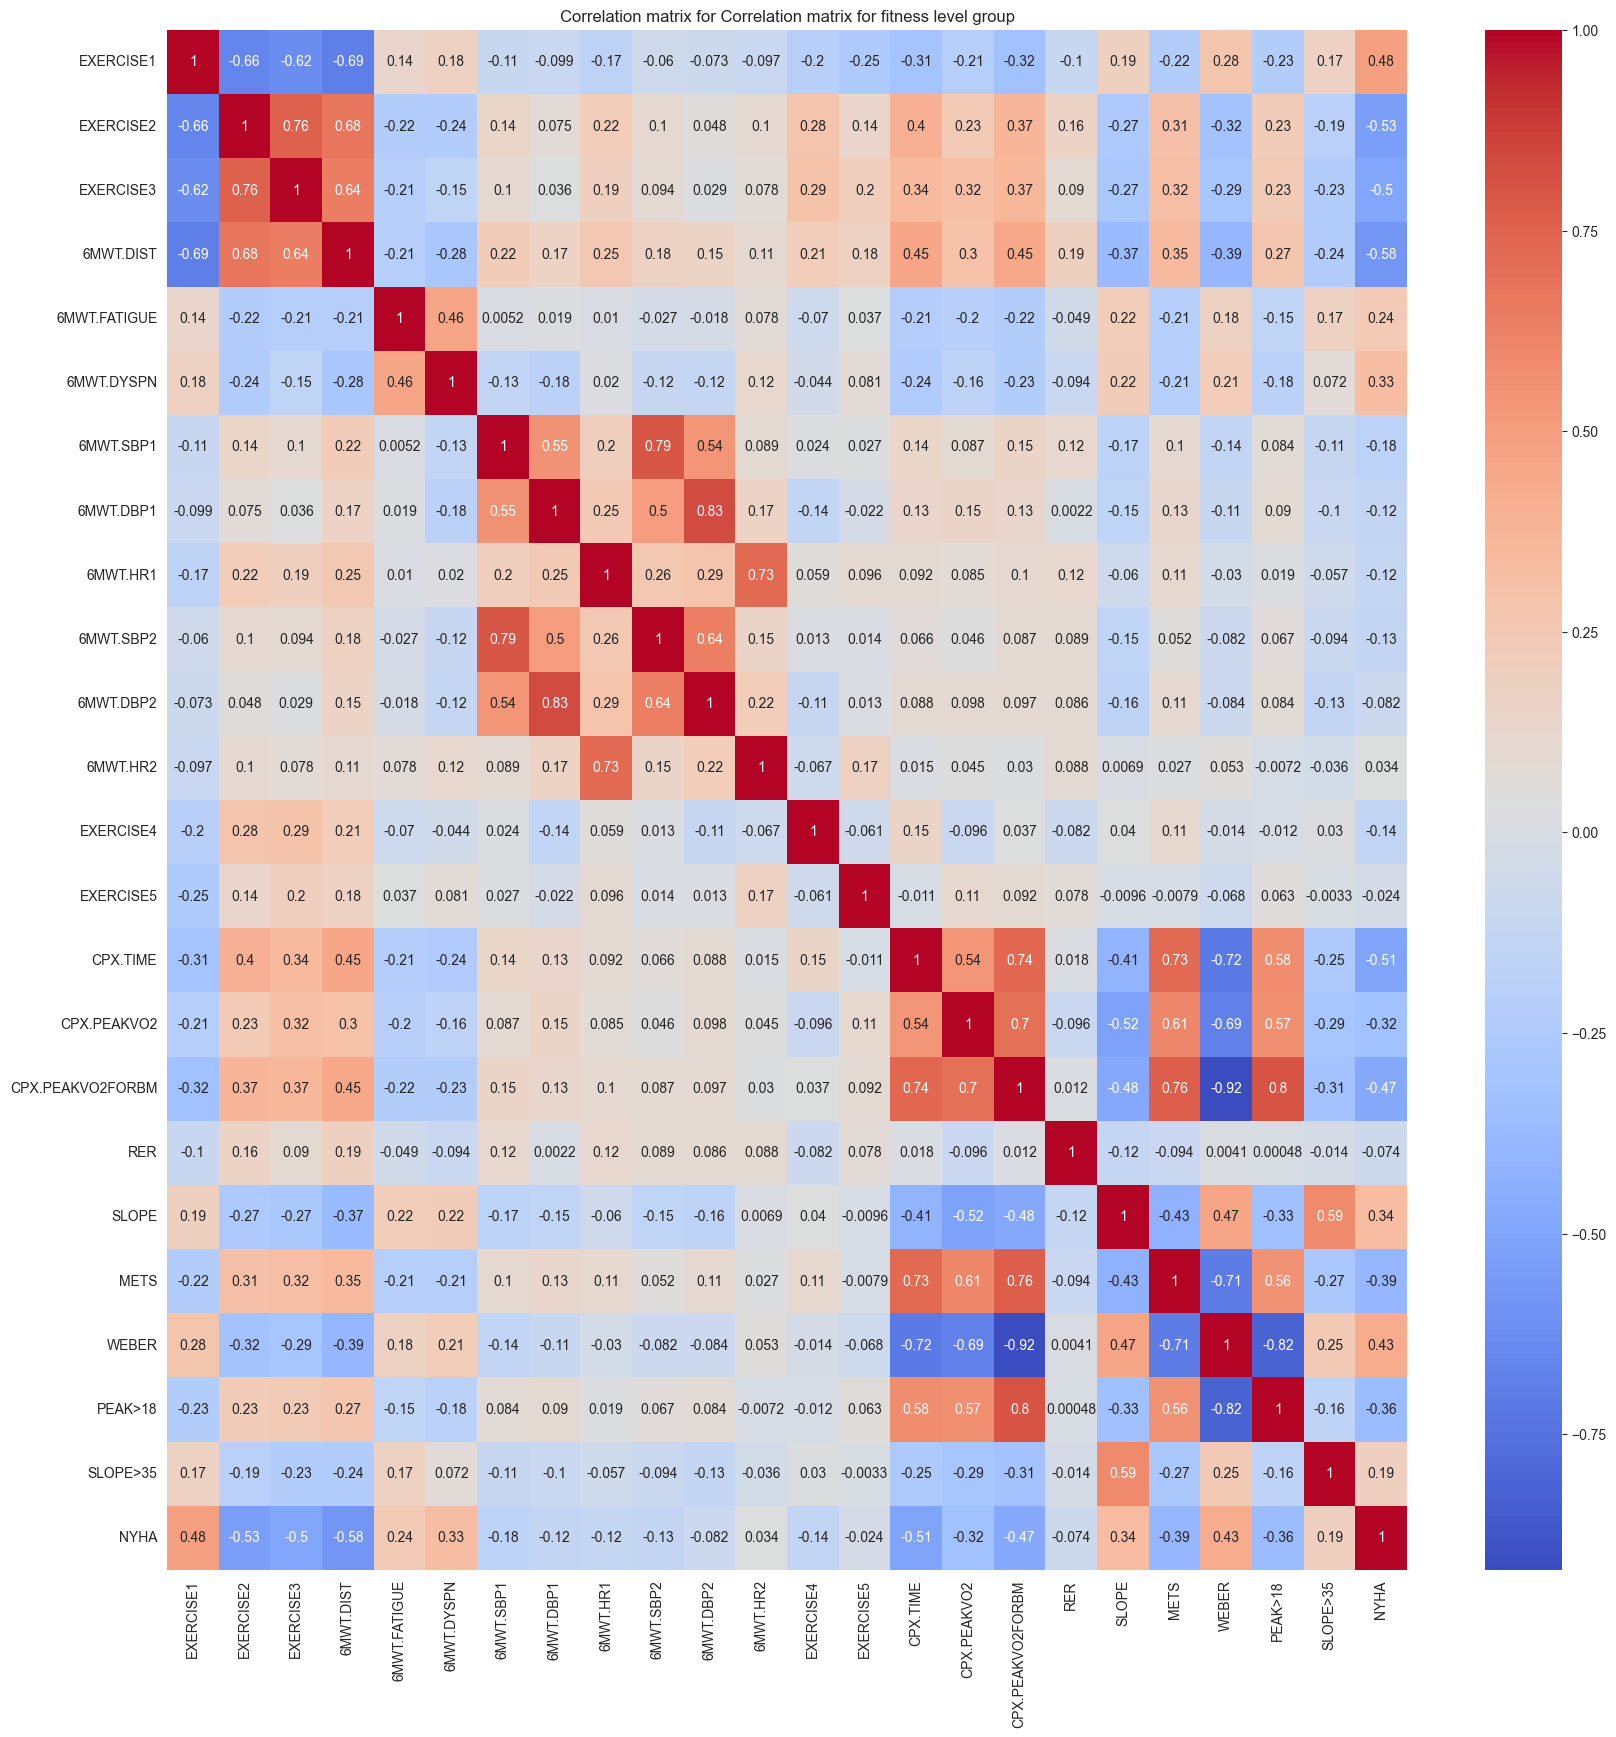

                  correlation  missing_values  importance
6MWT.DIST            0.579540               0    0.174248
EXERCISE2            0.534651               0    0.015679
CPX.TIME             0.505976               0    0.101117
EXERCISE3            0.498229               0    0.051732
EXERCISE1            0.483570               0    0.065454
CPX.PEAKVO2FORBM     0.469179               0    0.043252
WEBER                0.428791               0    0.011073
METS                 0.390270               0    0.061597
PEAK>18              0.358438               0    0.000000
SLOPE                0.339074               0    0.089960
6MWT.DYSPN           0.331550               0    0.044184
CPX.PEAKVO2          0.323248               0    0.069277
6MWT.FATIGUE         0.238910               0    0.026397
SLOPE>35             0.193296               0    0.000000
6MWT.SBP1            0.176010               0    0.005353
EXERCISE4            0.139605               0    0.043926
6MWT.SBP2     

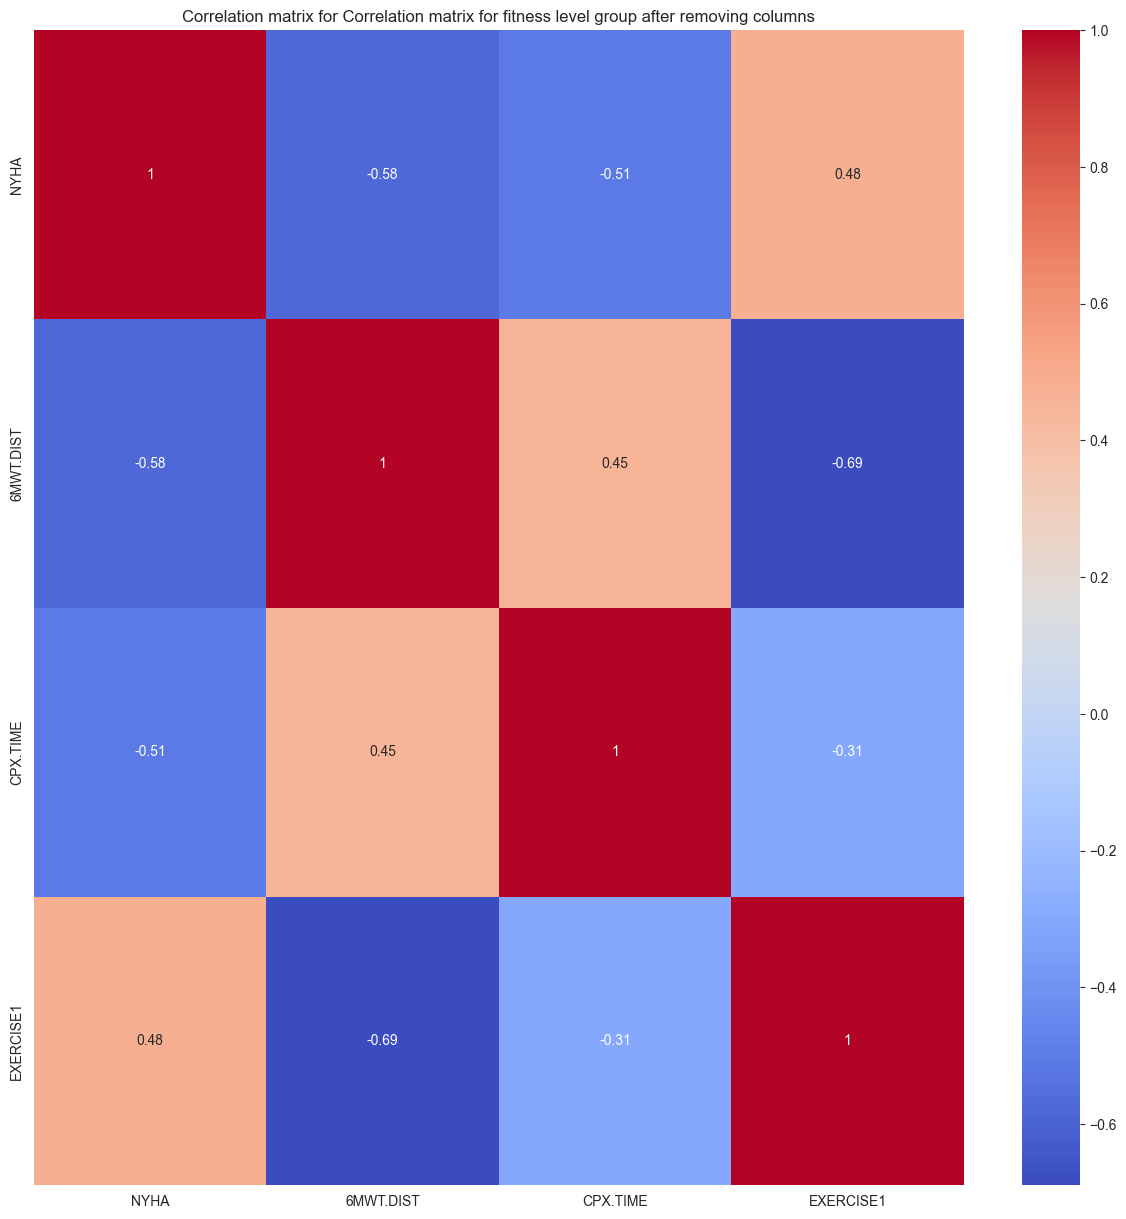

Cross validation score before grid search: 0.5239130434782608
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: 0.6130434782608696
Cross validation score after grid search: 0.5478260869565217
Mean cross validation score after optimize: 0.5478260869565217
Growth of cross validation score: 0.023913043478260843
     feature  importance
0  6MWT.DIST    0.438748
1   CPX.TIME    0.343060
2  EXERCISE1    0.218192


In [161]:
# Correlation matrix
plot_corr_matrix(fitness_level_group, 'Correlation matrix for fitness level group', (20, 20))

# Check correlation with NYHA
group_checking = prepare_group_checking(fitness_level_group)

# Prepare data for Decision Tree Classifier
X = fitness_level_group.drop(columns=['NYHA'])
y = fitness_level_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

group_checking = add_importance_to_group_checking(group_checking,  model.feature_importances_, X)
group_checking = convert_group_checking_to_dataframe(group_checking)
print(group_checking)

# Remove columns with correlation less than 0.15
columns_to_remove = group_checking[group_checking['correlation'] < 0.35].index
fitness_level_group = fitness_level_group.drop(columns=columns_to_remove)

# Use only NYHA, 6MWT.DIST, CPX.TIME, EXERCISE1 columns
fitness_level_group = fitness_level_group[['NYHA', '6MWT.DIST', 'CPX.TIME', 'EXERCISE1']]

plot_corr_matrix(fitness_level_group, 'Correlation matrix for fitness level group after removing columns', (15, 15))

X = fitness_level_group.drop(columns=['NYHA'])
y = fitness_level_group['NYHA']
model = DecisionTreeClassifier()
model.fit(X, y)

grid_search, before_grid_search = create_grid_search(model, X, y)
fitness_level_model = grid_search.best_estimator_

test_with_cross_validation(fitness_level_model, X, y, before_grid_search=before_grid_search)
print_feature_importances(fitness_level_model.feature_importances_, X)

# Conclusion from fitness level group:
From the above table we can see that the most important variables are:
- 6MWT.DIST - distance in 6 minute walk test (dystans w teście 6 minutowego marszu)
- CPX.PEAKVO2FORBM - respiratory exchange ratio(index of metabolism during an exercise on a treadmill (współczynnik wymiany oddechowej - wskaźnik metabolizmu podczas ćwiczeń na bieżni))
- CPX.TIME - time of exercise on a treadmill (czas ćwiczeń na bieżni)
- EXERCISE1 - number of seconds needed to complete the task, higher number = worse)  (liczba sekund potrzebnych do wykonania zadania, im wyższa liczba tym gorzej)
- EXERCISE3 - number of repeated movements during the task (higher number = better result) (liczba powtórzeń ruchów podczas zadania, im wyższa liczba tym lepszy wynik)
- CPX.PEAKVO2 - peak oxygen consumption during exercise testing on a treadmill (maksymalne zużycie tlenu podczas testu wysiłkowego na bieżni)

From this group we choose 6MWT.DIST, CPX.PEAKVO2FORBM, CPX.TIME, EXERCISE1, EXERCISE3 variables as discriminative variables (CPX.PEAKV02 is highly correlated with CPX.PEAKVO2FORBM). The missing values will be replaced with mean.

# Approach witch create ensemble model from all groups

In [187]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[('treatment', treatment_model), ('biochemistry', biochemistry_model), ('clinical', clinical_model), ('comorbidities_model', comorbidities_model), ('fitness_level', fitness_level_model)])
voting_model.fit(X, y)

# Find the best parameters for voting model
param_grid = {
    'voting': ['hard', 'soft'],
    'flatten_transform': [True, False],
}

grid_search = GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=100)
grid_search.fit(X, y)
voting_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=100.
  warnings.warn(


Best parameters: {'flatten_transform': True, 'voting': 'hard'}
Best score: 0.6165


 # Prepare data for machine learning based on chosen variables

In [193]:
# Create new dataframe with chosen variables
df = pd.DataFrame()
df['NYHA'] = NYHA

columns_to_add = clinical_group.columns
for column in columns_to_add:
    df[column] = clinical_group[column]

df['AGE'] = demographic_group['AGE']
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

# columns_to_add = anthropometric_group.columns
# for column in columns_to_add:
#     df[column] = anthropometric_group[column]

columns_to_add = comorbidities_group.columns
for column in columns_to_add:
    df[column] = comorbidities_group[column]

columns_to_add = treatment_group.columns
for column in columns_to_add:
    df[column] = treatment_group[column]

columns_to_add = fitness_level_group.columns
for column in columns_to_add:
    df[column] = fitness_level_group[column]


# Remove OQLsub1, AGE, KIDNEY.DIS, EXERCISE1, AF, DEATH?, MR, DM, DIUR, DIGOX from columns
df = df.drop(['MR', 'DM', 'DIUR', 'DEATH?'], axis=1)

# Training the model

In [194]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report


def report(model, X_train, X_test, y_train, y_test, filename=None):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    confusion_matrix(y_test, preds)
    # Plot the confusion matrix
    plt.figure(figsize=(10, 6), dpi=300)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap="viridis", fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    if filename:
        name = filename
    else:
        name = f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    # Save the plot with good quality
    plt.savefig(f"plots/confusion_matrix_{name}.png", dpi=1000)
    # Plot the tree
    plt.figure(figsize=(20, 10), dpi=300)
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True,
              class_names=["NYHA I", "NYHA II", "NYHA III", "NYHA IV"]);
    # Save the plot with good quality set name for plot with particular model parameters
    plt.savefig(f"plots/decision_tree_{name}.png", dpi=1000)

In [195]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
X = df.drop(columns=["NYHA"])
y = df["NYHA"]

model = DecisionTreeClassifier()

# Find the best parameters for the model
grid_search, _ = create_grid_search(model, X, y)
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Feature importances: {best_model.feature_importances_}")

Cross validation score before grid search: 0.5217391304347826
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.5869565217391304
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.5869565217391304
Feature importances: [0.04069192 0.0505146  0.03546972 0.02497439 0.02903188 0.06311436
 0.35285873 0.26260488 0.14073952]


In [192]:
print_feature_importances(best_model.feature_importances_, X)


      feature  importance
7   6MWT.DIST    0.364810
8    CPX.TIME    0.253562
9   EXERCISE1    0.134477
6       DIGOX    0.050898
2      LVEF.0    0.050482
3         AGE    0.041620
1     OQLsub1    0.040666
5  KIDNEY.DIS    0.029013
4          AF    0.024958
0      DEATH?    0.009512
